In [1]:
import pandas as pd
import numpy as np
import collections
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
import math 

from mozo import save_model, merge_with_features, how_many_levels, compare_and_combine, compare_and_combine_2

In [2]:
train = pd.read_hdf('~/pml7/module3/input/train.car_price.h5')
test = pd.read_hdf('~/pml7/module3/input/test.car_price.h5') #zbiór testowy bez odpowiedzi

In [3]:
how_many_levels(train, 1, 2)
how_many_levels(train, 5, 6)
how_many_levels(train, 78, 78)
how_many_levels(train, 84, 84)
how_many_levels(train, 88, 88)
how_many_levels(train, 92, 92)
how_many_levels(train, 97, 100)
how_many_levels(train, 102, 102)
how_many_levels(train, 111, 116)
how_many_levels(train, 122, 122)


1: price_currency [100.00%=106494/106494]: 
['PLN', 'EUR']
2: price_details [100.00%=106494/106494]: 
['Cena Brutto, Do negocjacji', 'Cena Brutto', 'Cena Brutto, Faktura VAT', 'Cena Brutto, Do negocjacji, Faktura VAT', 'Cena Netto, Faktura VAT', 'Cena Netto, Do negocjacji, Faktura VAT', 'Cena Netto']
5: seller_name [60.64%=64581/106494]: 
[None, 'AAA AUTO - aż 1000 samochodów w ofercie! do 24 m-cy gwarancji - CarLife! aż 80% pojazdów krajowych!', 'Master1', 'AUTO-HANDEL', 'CARSERWIS', 'Auto Handel', 'Bawaria Motors Warszawa - Dealer BMW - MINI - BMW M - BMW i']
6: seller_type [99.90%=106385/106494]: 
['Dealer', 'Osoba prywatna', None]
78: param_uszkodzony [3.99%=4250/106494]: 
[None, 'Tak']
84: param_country-of-origin [0.05%=54/106494]: 
[None, 'Polska', 'Niemcy', 'Francja', 'Stany Zjednoczone', 'Belgia', 'Dania']
88: param_faktura-vat [24.78%=26389/106494]: 
[None, 'Tak']
92: param_homologacja-ciężarowa [0.72%=764/106494]: 
[None, 'Tak']
97: param_financing-option [0.03%=29/106494]: 


In [51]:
how_many_levels(train)


0: created_at: 
['12:13, 2 marca 2018', '12:17, 2 marca 2018', '12:14, 2 marca 2018', None, '22:19, 28 lutego 2018', '12:12, 2 marca 2018', '15:08, 2 marca 2018']
1: price_currency: 
['PLN', 'EUR']
2: price_details: 
['Cena Brutto, Do negocjacji', 'Cena Brutto', 'Cena Brutto, Faktura VAT', 'Cena Brutto, Do negocjacji, Faktura VAT', 'Cena Netto, Faktura VAT', 'Cena Netto, Do negocjacji, Faktura VAT', 'Cena Netto']
3: price_value: 
[19900.0, 16900.0, 9900.0, 15900.0, 14900.0, 12900.0, 13900.0]
4: seller_address: 
['Radom, Mazowieckie', 'Lublin, Lubelskie', 'Kielce, Świętokrzyskie', 'Ostrów Mazowiecka, ostrowski, Mazowieckie', 'Bydgoszcz, Kujawsko-pomorskie', 'Ostrów Wielkopolski, ostrowski, Wielkopolskie', 'Okulickiego 3B - 05-500 Piaseczno, piaseczyński, Mazowieckie (Polska)']
5: seller_name: 
[None, 'AAA AUTO - aż 1000 samochodów w ofercie! do 24 m-cy gwarancji - CarLife! aż 80% pojazdów krajowych!', 'Master1', 'AUTO-HANDEL', 'CARSERWIS', 'Auto Handel', 'Bawaria Motors Warszawa - Deale

61: feature_hak: 
[False, True]
62: feature_abs: 
[True, False]
63: feature_wielofunkcyjna-kierownica: 
[True, False]
64: feature_światła-xenonowe: 
[False, True]
65: feature_gniazdo-usb: 
[False, True]
66: feature_tapicerka-skórzana: 
[False, True]
67: feature_gniazdo-aux: 
[False, True]
68: feature_esp-(stabilizacja-toru-jazdy): 
[True, False]
69: feature_alarm: 
[True, False]
70: feature_podgrzewane-tylne-siedzenia: 
[False, True]
71: feature_mp3: 
[False, True]
72: feature_tempomat: 
[True, False]
73: feature_hud-(wyświetlacz-przezierny): 
[False, True]
74: feature_elektrochromatyczne-lusterko-wsteczne: 
[False, True]
75: feature_relingi-dachowe: 
[False, True]
76: feature_elektrochromatyczne-lusterka-boczne: 
[False, True]
77: param_liczba-miejsc: 
['5', None, '7', '4', '2', '9', '6']
78: param_uszkodzony: 
[None, 'Tak']
79: param_marka-pojazdu: 
['Volkswagen', 'Opel', 'BMW', 'Audi', 'Ford', 'Renault', 'Mercedes-Benz']
80: param_model: 
[None, 'A6', 'Passat', 'A3', 'Avensis', 'C-M

119: param_kraj-pochodzenia: 
[None, 'Niemcy', 'Polska', 'Francja', 'Belgia', 'Szwajcaria', 'Stany Zjednoczone']
120: param_engine-power: 
[None, '150 HP', '110 HP', '100 HP', '90 HP', '190 HP', '105 HP']
121: param_year: 
[None, '2017', '2008', '2010', '2007', '2013', '2014']
122: param_serwisowany-w-aso: 
[None, 'Tak']
123: param_rodzaj-paliwa: 
['Diesel', 'Benzyna', 'Benzyna+LPG', 'Hybryda', None, 'Elektryczny', 'Benzyna+CNG']
124: param_możliwość-finansowania: 
[None, 'Tak']
125: param_registered-in-poland: 
[None, 'Tak']
126: param_transmission: 
[None, 'Na przednie koła', '4x4 (dołączany automatycznie)', '4x4 (stały)', 'Na tylne koła', '4x4 (dołączany ręcznie)']
127: param_miesięczna-rata: 
[None, '400 PLN', '600 PLN', '500 PLN', '700 PLN', '1 PLN', '450 PLN']
128: param_kod-silnika: 
[None, '320', '520', '318', '530', '525', 'E 220']
129: param_version: 
[None, 'C6 (2004-2011)', 'I (2002-2010)', 'II (2007-2014)', 'Mk3 (2010-)', '8P (2003-2012)', 'B6 (2005-2010)']
130: param_opła

In [21]:
print(pd.crosstab(train['price_details'], train['price_currency']))
print('==========================================================================================================')
print(pd.crosstab(train['price_details'], train['seller_type']))
print('==========================================================================================================')
print(pd.crosstab(train['price_details'], train['param_uszkodzony']))
print('==========================================================================================================')
print(pd.crosstab(train['price_details'], train['param_country-of-origin']))
print('==========================================================================================================')
print(pd.crosstab(train['price_details'], train['param_faktura-vat']))
print('==========================================================================================================')

price_currency                                      EUR    PLN
price_details                                                 
Brutto                                                0     27
Brutto                                        ,...    0     51
Brutto                    , Faktura VAT               0     10
Brutto                    , Faktura VAT        ...    0     10
Cena Brutto                                          76  29072
Cena Brutto, Do negocjacji                           48  49374
Cena Brutto, Do negocjacji, Faktura VAT               9   7519
Cena Brutto, Faktura VAT                              4  13777
Cena Netto                                           33    683
Cena Netto, Do negocjacji                             4    681
Cena Netto, Do negocjacji, Faktura VAT               15   2262
Cena Netto, Faktura VAT                              15   2813
Gross                                                 0      1
Netto                                        , ...    0

In [22]:
print(pd.crosstab(train['price_details'], train['param_homologacja-ciężarowa']))
print('==========================================================================================================')
print(pd.crosstab(train['price_details'], train['param_financing-option']))
print('==========================================================================================================')
print(pd.crosstab(train['price_details'], train['param_original-owner']))
print('==========================================================================================================')
print(pd.crosstab(train['price_details'], train['param_vat-marża']))
print('==========================================================================================================')
print(pd.crosstab(train['price_details'], train['param_kategoria']))
print('==========================================================================================================')

param_homologacja-ciężarowa              Tak
price_details                               
Cena Brutto                              101
Cena Brutto, Do negocjacji               172
Cena Brutto, Do negocjacji, Faktura VAT  102
Cena Brutto, Faktura VAT                 122
Cena Netto                                 5
Cena Netto, Do negocjacji                  9
Cena Netto, Do negocjacji, Faktura VAT   118
Cena Netto, Faktura VAT                  135
param_financing-option                   Tak
price_details                               
Cena Brutto                                4
Cena Brutto, Do negocjacji                11
Cena Brutto, Do negocjacji, Faktura VAT    6
Cena Brutto, Faktura VAT                   7
Cena Netto, Faktura VAT                    1
param_original-owner                     Tak
price_details                               
Cena Brutto                                9
Cena Brutto, Do negocjacji                11
Cena Brutto, Do negocjacji, Faktura VAT    8
Cena Brutt

In [24]:
print(pd.crosstab(train['price_details'], train['param_leasing']))
print('==========================================================================================================')
print(pd.crosstab(train['price_details'], train['param_vat-discount']))
print('==========================================================================================================')
print(pd.crosstab(train['price_details'], train['param_no-accident']))
print('==========================================================================================================')
print(pd.crosstab(train['price_details'], train['param_liczba-pozostałych-rat']))
print('==========================================================================================================')
print(pd.crosstab(train['price_details'], train['param_zarejestrowany-w-polsce']))
print('==========================================================================================================')

param_leasing                             Tak
price_details                                
Cena Brutto                              1139
Cena Brutto, Do negocjacji               1343
Cena Brutto, Do negocjacji, Faktura VAT  2597
Cena Brutto, Faktura VAT                 4646
Cena Netto                                 35
Cena Netto, Do negocjacji                   8
Cena Netto, Do negocjacji, Faktura VAT    773
Cena Netto, Faktura VAT                   913
param_vat-discount          Tak
price_details                  
Cena Brutto                   6
Cena Brutto, Do negocjacji   15
param_no-accident                        Tak
price_details                               
Cena Brutto                               10
Cena Brutto, Do negocjacji                19
Cena Brutto, Do negocjacji, Faktura VAT    7
Cena Brutto, Faktura VAT                  11
Cena Netto, Faktura VAT                    1
param_liczba-pozostałych-rat             1  10  11  12  14  15  16  17  18  \
price_details      

In [25]:
print(pd.crosstab(train['price_details'], train['param_oferta-od']))
print('==========================================================================================================')
print(pd.crosstab(train['price_details'], train['param_serwisowany-w-aso']))
print('==========================================================================================================')
print(pd.crosstab(train['price_details'], train['param_możliwość-finansowania']))
print('==========================================================================================================')
print(pd.crosstab(train['price_details'], train['param_registered-in-poland']))
print('==========================================================================================================')
print(pd.crosstab(train['price_details'], train['param_miesięczna-rata']))
print('==========================================================================================================')

param_oferta-od                          Firmy  Osoby prywatnej
price_details                                                  
Cena Brutto                              17668            11480
Cena Brutto, Do negocjacji               23438            25984
Cena Brutto, Do negocjacji, Faktura VAT   5985             1543
Cena Brutto, Faktura VAT                 12963              818
Cena Netto                                 357              359
Cena Netto, Do negocjacji                  161              524
Cena Netto, Do negocjacji, Faktura VAT    1722              555
Cena Netto, Faktura VAT                   2283              545
param_serwisowany-w-aso                    Tak
price_details                                 
Cena Brutto                              12952
Cena Brutto, Do negocjacji               24082
Cena Brutto, Do negocjacji, Faktura VAT   4873
Cena Brutto, Faktura VAT                  6685
Cena Netto                                 184
Cena Netto, Do negocjacji      

In [26]:
print(pd.crosstab(train['price_details'], train['param_opłata-początkowa']))
print('==========================================================================================================')
print(pd.crosstab(train['price_details'], train['param_kierownica-po-prawej-(anglik)']))
print('==========================================================================================================')
print(pd.crosstab(train['price_details'], train['param_vat-free']))
print('==========================================================================================================')
print(pd.crosstab(train['price_details'], train['param_stan']))
print('==========================================================================================================')
print(pd.crosstab(train['price_details'], train['param_bezwypadkowy']))
print('==========================================================================================================')
print(pd.crosstab(train['price_details'], train['param_monthly-payment-value']))
print('==========================================================================================================')

param_opłata-początkowa                  1 000 PLN  1 500 PLN  1 520 PLN  \
price_details                                                              
Cena Brutto                                      0          1          0   
Cena Brutto, Do negocjacji                       1          0          0   
Cena Brutto, Do negocjacji, Faktura VAT          0          0          0   
Cena Brutto, Faktura VAT                         2          0          0   
Cena Netto                                       0          0          1   
Cena Netto, Do negocjacji                        0          0          0   
Cena Netto, Do negocjacji, Faktura VAT           0          0          0   
Cena Netto, Faktura VAT                          0          1          0   

param_opłata-początkowa                  1 730 PLN  1 999 PLN  1 PLN  \
price_details                                                          
Cena Brutto                                      0          0      6   
Cena Brutto, Do negocja

In [28]:
(pd.crosstab(train['seller_name'], train['price_details']))


price_details,Cena Brutto,"Cena Brutto, Do negocjacji","Cena Brutto, Do negocjacji, Faktura VAT","Cena Brutto, Faktura VAT",Cena Netto,"Cena Netto, Do negocjacji","Cena Netto, Do negocjacji, Faktura VAT","Cena Netto, Faktura VAT"
seller_name,,,,,,,,
""" SKOLIK CAR"" Auto Komis Samochody Powypadkowe",5,0,0,3,0,0,0,0
""""""" ADAM 12 """" SPRAWDZONE SAMOCHODY UŻYWANE Z GWARANCJĄ TECHNICZNĄ VIP",12,7,0,0,2,0,1,0
"""AUTO HANDEL"" AUTO KOMIS",0,11,0,0,0,0,0,0
"""AUTO PIOTREK""",0,0,2,0,0,0,0,0
"""AUTO-BOSS""",7,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
☆☆☆ Joker-Cars ☆☆☆ Samochody Bezwypadkowe ☆☆☆,0,6,0,0,0,0,0,0
✔✔✔ CARS NET ✔✔✔,6,0,0,0,0,0,0,0
✦✦AUTO-KESZ✦✦BEZWYPADKOWE SAMOCHODY Z NIEMIEC,0,2,0,0,0,0,0,0


In [35]:
print((train['price_details'].value_counts()))


Cena Brutto, Do negocjacji                                                    49422
Cena Brutto                                                                   29148
Cena Brutto, Faktura VAT                                                      13781
Cena Brutto, Do negocjacji, Faktura VAT                                        7528
Cena Netto, Faktura VAT                                                        2828
Cena Netto, Do negocjacji, Faktura VAT                                         2277
Cena Netto                                                                      716
Cena Netto, Do negocjacji                                                       685
Brutto                                        , Do negocjacji                    51
Brutto                                                                           27
Brutto                    , Faktura VAT                                          10
Brutto                    , Faktura VAT                    , Do negocjacji  

In [45]:
import re

train['netto'] = train.apply(lambda row: 1 if re.search('Netto', row['price_details']) else 0, axis=1)
print(pd.crosstab(train['price_details'], train['netto']))

train['faktura_VAT'] = train.apply(lambda row: 1 if re.search('Faktura VAT', row['price_details']) else 0, axis=1)
print(pd.crosstab(train['price_details'], train['faktura_VAT']))

train['cena_do_negocjacji'] = train.apply(lambda row: 1 if re.search('negocjacji', row['price_details']) else 0, axis=1)
print(pd.crosstab(train['price_details'], train['cena_do_negocjacji']))


netto                                                   0     1
price_details                                                  
Brutto                                                 27     0
Brutto                                        ,...     51     0
Brutto                    , Faktura VAT                10     0
Brutto                    , Faktura VAT        ...     10     0
Cena Brutto                                         29148     0
Cena Brutto, Do negocjacji                          49422     0
Cena Brutto, Do negocjacji, Faktura VAT              7528     0
Cena Brutto, Faktura VAT                            13781     0
Cena Netto                                              0   716
Cena Netto, Do negocjacji                               0   685
Cena Netto, Do negocjacji, Faktura VAT                  0  2277
Cena Netto, Faktura VAT                                 0  2828
Gross                                                   1     0
Netto                                   

In [49]:
print(pd.crosstab(train['netto'], train['faktura_VAT']))
print('==========================================================================================================')

faktura_VAT      0      1
netto                    
0            78649  21329
1             1403   5113


In [3]:
total = pd.concat([train, test], ignore_index=True)

In [50]:
print(pd.crosstab(train['netto'], train['price_currency']))
print('==========================================================================================================')
print(pd.crosstab(train['netto'], train['seller_type']))
print('==========================================================================================================')
print(pd.crosstab(train['netto'], train['param_uszkodzony']))
print('==========================================================================================================')
print(pd.crosstab(train['netto'], train['param_country-of-origin']))
print('==========================================================================================================')
print(pd.crosstab(train['netto'], train['param_faktura-vat']))
print('==========================================================================================================')
print(pd.crosstab(train['netto'], train['param_homologacja-ciężarowa']))
print('==========================================================================================================')
print(pd.crosstab(train['netto'], train['param_financing-option']))
print('==========================================================================================================')
print(pd.crosstab(train['netto'], train['param_original-owner']))
print('==========================================================================================================')
print(pd.crosstab(train['netto'], train['param_vat-marża']))
print('==========================================================================================================')
print(pd.crosstab(train['netto'], train['param_kategoria']))
print('==========================================================================================================')
print(pd.crosstab(train['netto'], train['param_leasing']))
print('==========================================================================================================')
print(pd.crosstab(train['netto'], train['param_vat-discount']))
print('==========================================================================================================')
print(pd.crosstab(train['netto'], train['param_no-accident']))
print('==========================================================================================================')
print(pd.crosstab(train['netto'], train['param_liczba-pozostałych-rat']))
print('==========================================================================================================')
print(pd.crosstab(train['netto'], train['param_zarejestrowany-w-polsce']))
print('==========================================================================================================')
print(pd.crosstab(train['netto'], train['param_oferta-od']))
print('==========================================================================================================')
print(pd.crosstab(train['netto'], train['param_serwisowany-w-aso']))
print('==========================================================================================================')
print(pd.crosstab(train['netto'], train['param_możliwość-finansowania']))
print('==========================================================================================================')
print(pd.crosstab(train['netto'], train['param_registered-in-poland']))
print('==========================================================================================================')
print(pd.crosstab(train['netto'], train['param_miesięczna-rata']))
print('==========================================================================================================')
print(pd.crosstab(train['netto'], train['param_opłata-początkowa']))
print('==========================================================================================================')
print(pd.crosstab(train['netto'], train['param_kierownica-po-prawej-(anglik)']))
print('==========================================================================================================')
print(pd.crosstab(train['netto'], train['param_vat-free']))
print('==========================================================================================================')
print(pd.crosstab(train['netto'], train['param_stan']))
print('==========================================================================================================')
print(pd.crosstab(train['netto'], train['param_bezwypadkowy']))
print('==========================================================================================================')
print(pd.crosstab(train['netto'], train['param_monthly-payment-value']))
print('==========================================================================================================')

price_currency  EUR    PLN
netto                     
0               137  99841
1                67   6449
seller_type  Dealer  Osoba prywatna
netto                              
0             60058           39821
1              4523            1983
param_uszkodzony   Tak
netto                 
0                 3996
1                  254
param_country-of-origin  Belgia  Dania  Francja  Holandia  Niemcy  Polska  \
netto                                                                       
0                             2      1        4         1      19      23   
1                             0      0        0         0       0       1   

param_country-of-origin  Stany Zjednoczone  
netto                                       
0                                        3  
1                                        0  
param_faktura-vat    Tak
netto                   
0                  21285
1                   5104
param_homologacja-ciężarowa  Tak
netto                           
0

#Stratyfikackja:
- marka
- rocznik
- osob/ciez
- cena pln log
- netto, vat, negocjacja
- wypadkowy
- nowy/uzywany
- seller_type

In [88]:
how_many_levels(total, nameContains="feature_")


7: feature_czujniki-parkowania-przednie [ALL=160616]: 
[False, True]
8: feature_poduszka-powietrzna-chroniąca-kolana [ALL=160616]: 
[False, True]
9: feature_kurtyny-powietrzne [ALL=160616]: 
[True, False]
10: feature_klimatyzacja-dwustrefowa [ALL=160616]: 
[False, True]
11: feature_światła-led [ALL=160616]: 
[False, True]
12: feature_czujnik-zmierzchu [ALL=160616]: 
[False, True]
13: feature_elektrycznie-ustawiane-lusterka [ALL=160616]: 
[True, False]
14: feature_asr-(kontrola-trakcji) [ALL=160616]: 
[True, False]
15: feature_poduszka-powietrzna-kierowcy [ALL=160616]: 
[True, False]
16: feature_cd [ALL=160616]: 
[True, False]
17: feature_elektryczne-szyby-przednie [ALL=160616]: 
[True, False]
18: feature_poduszka-powietrzna-pasażera [ALL=160616]: 
[True, False]
19: feature_system-start-stop [ALL=160616]: 
[False, True]
20: feature_światła-do-jazdy-dziennej [ALL=160616]: 
[False, True]
21: feature_komputer-pokładowy [ALL=160616]: 
[True, False]
22: feature_elektryczne-szyby-tylne [ALL=1

62: feature_abs [ALL=160616]: 
[True, False]
63: feature_wielofunkcyjna-kierownica [ALL=160616]: 
[True, False]
64: feature_światła-xenonowe [ALL=160616]: 
[False, True]
65: feature_gniazdo-usb [ALL=160616]: 
[False, True]
66: feature_tapicerka-skórzana [ALL=160616]: 
[False, True]
67: feature_gniazdo-aux [ALL=160616]: 
[False, True]
68: feature_esp-(stabilizacja-toru-jazdy) [ALL=160616]: 
[True, False]
69: feature_alarm [ALL=160616]: 
[True, False]
70: feature_podgrzewane-tylne-siedzenia [ALL=160616]: 
[False, True]
71: feature_mp3 [ALL=160616]: 
[False, True]
72: feature_tempomat [ALL=160616]: 
[True, False]
73: feature_hud-(wyświetlacz-przezierny) [ALL=160616]: 
[False, True]
74: feature_elektrochromatyczne-lusterko-wsteczne [ALL=160616]: 
[False, True]
75: feature_relingi-dachowe [ALL=160616]: 
[False, True]
76: feature_elektrochromatyczne-lusterka-boczne [ALL=160616]: 
[False, True]


In [54]:
from sklearn.datasets import load_iris, load_boston
import pandas as pd

import xgboost as xgb
import xgbfir

import matplotlib.pyplot as plt
%matplotlib inline

In [154]:
filter_col = [col for col in train if col.startswith('feature_')]
#filter_col
train, test = merge_with_features('ft_price_train.csv', train, test)


train
Index(['car_id', 'pln_to_eur', 'price_value_pln',
       'price_value_pln_log_transl'],
      dtype='object')
test
Index(['car_id', 'pln_to_eur'], dtype='object')


In [155]:
xgb_rmodel = xgb.XGBRegressor().fit(train[filter_col], train['price_value_pln_log_transl'])

In [156]:
xgbfir.saveXgbFI(xgb_rmodel, feature_names=filter_col, OutputXlsxFile='output/feature_XgbFI.xlsx')

In [66]:
pd.read_excel('output/feature_XgbFI.xlsx', 'Interaction Depth 0')

,Interaction,Gain,FScore,wFScore,Average wFScore,Average Gain,Expected Gain,Gain Rank,FScore Rank,wFScore Rank,Avg wFScore Rank,Avg Gain Rank,Expected Gain Rank,Average Rank,Average Tree Index,Average Tree Depth
0,feature_bluetooth,65329.637692,126,16.630054,0.131985,518.489188,64933.265913,1,3,1,13,1,1,3.333333,45.460317,3.833333
1,feature_kamera-cofania,12315.812181,91,15.992770,0.175745,135.338595,4648.180837,2,34,2,2,2,2,7.333333,41.450549,3.714286
2,feature_światła-led,6880.080271,98,13.218933,0.134887,70.204901,2760.603040,3,27,5,12,3,3,8.833333,43.877551,3.979592
3,feature_system-start-stop,6704.640077,110,15.123688,0.137488,60.951273,1832.583880,4,16,3,11,4,7,7.500000,43.300000,3.936364
4,feature_czujniki-parkowania-przednie,5137.493978,123,10.717562,0.087135,41.768244,2737.908275,5,6,14,43,7,4,13.166667,47.373984,4.121951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,feature_czujnik-martwego-pola,104.549610,54,7.466355,0.138266,1.936104,5.838769,66,64,48,10,65,68,53.500000,54.574074,4.000000
66,feature_ogrzewanie-postojowe,103.331747,52,5.291847,0.101766,1.987149,6.670309,67,66,62,29,64,67,59.166667,48.730769,4.076923
67,feature_tempomat-aktywny,89.443357,44,5.239863,0.119088,2.032804,10.142030,68,68,64,17,63,60,56.666667,57.795455,4.113636
68,feature_ogranicznik-prędkości,78.675512,53,5.681635,0.107201,1.484444,9.089845,69,65,61,23,70,63,58.500000,57.886792,4.169811


In [163]:
pd.set_option('display.max_rows', 100)

print(pd.read_excel('output/feature_XgbFI.xlsx', 'Interaction Depth 0')[['Interaction']])

                                      Interaction
0                               feature_bluetooth
1                          feature_kamera-cofania
2                             feature_światła-led
3                       feature_system-start-stop
4            feature_czujniki-parkowania-przednie
5               feature_światła-do-jazdy-dziennej
6            feature_poduszka-powietrzna-kierowcy
7                   feature_łopatki-zmiany-biegów
8           feature_esp-(stabilizacja-toru-jazdy)
9                  feature_wspomaganie-kierownicy
10              feature_czujniki-parkowania-tylne
11                     feature_tapicerka-welurowa
12                                     feature_cd
13                               feature_tempomat
14                        feature_radio-fabryczne
15                            feature_gniazdo-usb
16                          feature_nawigacja-gps
17                                 feature_isofix
18                     feature_komputer-pokładowy


In [62]:
pd.read_excel('output/feature_XgbFI.xlsx', 'Interaction Depth 1')

,Interaction,Gain,FScore,wFScore,Average wFScore,Average Gain,Expected Gain,Gain Rank,FScore Rank,wFScore Rank,Avg wFScore Rank,Avg Gain Rank,Expected Gain Rank,Average Rank,Average Tree Index,Average Tree Depth
0,feature_bluetooth|feature_kamera-cofania,67708.177233,12,2.213458,0.184455,5642.348103,27221.478406,1,4,2,18,3,2,5.000000,25.416667,2.916667
1,feature_bluetooth|feature_światła-do-jazdy-dzi...,46947.027732,8,1.279997,0.160000,5868.378466,28005.049790,2,19,9,26,1,1,9.666667,35.250000,3.750000
2,feature_bluetooth|feature_światła-led,28925.762575,5,1.074267,0.214853,5785.152515,15294.358244,3,50,14,13,2,3,14.166667,28.600000,2.000000
3,feature_kamera-cofania|feature_system-start-stop,17010.283644,12,1.792655,0.149388,1417.523637,4456.407164,4,5,4,28,7,4,8.666667,31.666667,3.000000
4,feature_kamera-cofania|feature_łopatki-zmiany-...,13139.640982,9,2.129219,0.236580,1459.960109,1602.405092,5,13,3,10,6,10,7.833333,22.111111,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,feature_elektrycznie-ustawiane-lusterka|featur...,311.254867,10,0.657784,0.065778,31.125487,27.093231,96,12,34,62,100,84,64.666667,35.800000,3.700000
96,feature_poduszka-powietrzna-pasażera|feature_t...,309.763822,8,0.578342,0.072293,38.720478,46.946770,97,27,43,56,97,72,65.333333,54.000000,3.875000
97,feature_alufelgi|feature_szyberdach,309.729167,5,0.651661,0.130332,61.945833,94.084475,98,59,36,33,88,56,61.666667,26.200000,3.400000
98,feature_elektryczne-szyby-przednie|feature_tap...,306.459515,6,0.172423,0.028737,51.076586,13.368320,99,49,88,89,94,95,85.666667,44.500000,4.333333


In [65]:
pd.read_excel('output/feature_XgbFI.xlsx', 'Interaction Depth 2')

,Interaction,Gain,FScore,wFScore,Average wFScore,Average Gain,Expected Gain,Gain Rank,FScore Rank,wFScore Rank,Avg wFScore Rank,Avg Gain Rank,Expected Gain Rank,Average Rank,Average Tree Index,Average Tree Depth
0,feature_bluetooth|feature_kamera-cofania|featu...,72129.954588,5,0.883984,0.176797,14425.990918,20255.453214,1,1,1,29,4,2,6.333333,24.00,2.80
1,feature_bluetooth|feature_kamera-cofania|featu...,64553.579189,4,0.365194,0.091299,16138.394797,7856.174888,2,5,22,44,3,4,13.333333,18.00,2.75
2,feature_bluetooth|feature_system-start-stop|fe...,47520.354700,4,0.212763,0.053191,11880.088675,3850.096401,3,6,27,62,5,7,18.333333,16.75,2.00
3,feature_bluetooth|feature_poduszka-powietrzna-...,40472.058620,1,0.516358,0.516358,40472.058620,20898.060280,4,48,10,3,1,1,11.166667,0.00,2.00
4,feature_kamera-cofania|feature_system-start-st...,32893.790362,5,0.613443,0.122689,6578.758072,4467.991339,5,2,5,36,10,6,10.666667,0.80,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,feature_esp-(stabilizacja-toru-jazdy)|feature_...,876.437679,1,0.072201,0.072201,876.437679,63.279897,96,98,73,54,77,78,79.333333,4.00,3.00
96,feature_poduszka-powietrzna-kierowcy|feature_r...,873.516968,1,0.091808,0.091808,873.516968,80.195836,97,99,61,43,78,74,75.333333,4.00,4.00
97,feature_elektryczne-szyby-przednie|feature_pod...,868.113957,2,0.093188,0.046594,434.056979,39.937239,98,46,59,69,99,86,76.166667,4.00,4.00
98,feature_alufelgi|feature_światła-led|feature_ś...,857.729217,1,0.197335,0.197335,857.729217,169.260047,99,100,31,22,80,57,64.833333,6.00,2.00


In [89]:
how_many_levels(total, nameContains="param")


77: param_liczba-miejsc [88.76%=142559/160616]: 
['5', None, '7', '4', '2', '9', '6']
78: param_uszkodzony [3.97%=6384/160616]: 
[None, 'Tak']
79: param_marka-pojazdu [99.82%=160327/160616]: 
['Volkswagen', 'Opel', 'BMW', 'Audi', 'Ford', 'Renault', 'Mercedes-Benz']
80: param_model [0.08%=128/160616]: 
[None, 'Avensis', 'A6', 'A3', 'Seria 5', 'Mondeo', 'Passat']
81: param_engine-code [0.01%=14/160616]: 
[None, '525', '320', 'E 300', 'C 220', 'A 190', '118']
82: param_liczba-drzwi [90.71%=145688/160616]: 
['5', '4', None, '3', '2', '6', '7']
83: param_first-registration [0.03%=47/160616]: 
[None, '2 July 2005', '26 October 2010', '23 September 2013', '15 May 2007', '1 February 2016', '9 August 2012']
84: param_country-of-origin [0.05%=82/160616]: 
[None, 'Polska', 'Niemcy', 'Francja', 'Stany Zjednoczone', 'Belgia', 'Holandia']
85: param_pierwsza-rejestracja [36.25%=58229/160616]: 
[None, '1 styczeń 2007', '1 styczeń 2014', '1 styczeń 2016', '1 czerwiec 2007', '1 czerwiec 2012', '1 paździ

117: param_moc [91.11%=146331/160616]: 
[None, '150 KM', '140 KM', '90 KM', '105 KM', '110 KM', '115 KM']
118: param_make [0.08%=128/160616]: 
[None, 'Audi', 'Ford', 'Toyota', 'Opel', 'Volkswagen', 'BMW']
119: param_kraj-pochodzenia [67.96%=109150/160616]: 
[None, 'Niemcy', 'Polska', 'Francja', 'Belgia', 'Szwajcaria', 'Holandia']
120: param_engine-power [0.07%=115/160616]: 
[None, '150 HP', '140 HP', '90 HP', '116 HP', '110 HP', '100 HP']
121: param_year [0.08%=128/160616]: 
[None, '2017', '2010', '2007', '2008', '2014', '2013']
122: param_serwisowany-w-aso [49.21%=79045/160616]: 
[None, 'Tak']
123: param_rodzaj-paliwa [99.82%=160327/160616]: 
['Diesel', 'Benzyna', 'Benzyna+LPG', 'Hybryda', None, 'Elektryczny', 'Benzyna+CNG']
124: param_możliwość-finansowania [33.41%=53665/160616]: 
[None, 'Tak']
125: param_registered-in-poland [0.04%=58/160616]: 
[None, 'Tak']
126: param_transmission [0.07%=110/160616]: 
[None, 'Na przednie koła', 'Na tylne koła', '4x4 (dołączany automatycznie)', '4x4

In [78]:
total['param_marka-pojazdu'].value_counts()

Volkswagen    17343
Opel          14647
BMW           12477
Audi          12101
Ford          11331
              ...  
Tavria            1
Asia              1
DKW               1
Moskwicz          1
Talbot            1
Name: param_marka-pojazdu, Length: 103, dtype: int64

# zmienne w 2 wersjach:
- param_liczba-miejsc / param_nr-of-seats
- param_marka-pojazdu / param_make
- param_model / param_model-pojazdu
- param_kod-silnika / param_engine-code 
- param_liczba-drzwi / param_door-count
- param_pierwsza-rejestracja/ param_first-registration 
- param_kraj-pochodzenia/ param_country-of-origin 
- param_skrzynia-biegów/ param_gearbox 
- param_serwisowany-w-aso / param_service-record
- param_kolor/ param_color 
- param_pierwszy-właściciel/ param_original-owner  
- param_bezwypadkowy/ param_no-accident 
- param_zarejestrowany-w-polsce / param_registered-in-poland
- param_moc / param_engine-power
- param_rok-produkcji / param_year
- param_napęd / param_transmission
- param_pojemność-skokowa / param_engine-capacity
- param_rodzaj-paliwa / param_fuel-type 
- param_typ / param_body-type [Sedan] 
- param_emisja-co2 / param_co2-emissions
- param_filtr-cząstek-stałych / param_particle-filter
- param_uszkodzony / param_damaged 
- param_przebieg / param_mileage
- param_perłowy / param_pearl
- param_metalik / param_metallic
- param_leasing-concession / param_leasing
- param_możliwość-finansowania / param_financing-option 
- param_miesięczna-rata / param_monthly-payment-value
- param_wersja / param_version
- param_akryl-(niemetalizowany) / param_acrylic
- param_kategoria [Osobowe]
- param_oferta-od [Osoba pryw]
- param_stan [Nowy]
- param_faktura-vat 
- param_vat-free
- param_vat-marża 
- param_vat-discount
- param_homologacja-ciężarowa
- param_zarejestrowany-jako-zabytek 
- param_wartość-wykupu 
- param_liczba-pozostałych-rat
- param_zarejestrowany-w-polsce
- param_opłata-początkowa
- param_kierownica-po-prawej-(anglik)
- param_tuning
- param_matowy

In [41]:
train, test = merge_with_features('ft_price_test.csv', train, test)


train
Index(['car_id', 'pln_to_eur', 'price_value_pln',
       'price_value_pln_log_transl'],
      dtype='object')
test
Index(['car_id', 'pln_to_eur'], dtype='object')


In [42]:
compare_and_combine_2('param_liczba-miejsc / param_nr-of-seats', train)
compare_and_combine_2('param_marka-pojazdu / param_make', train)
compare_and_combine_2('param_model-pojazdu / param_model', train)
compare_and_combine_2('param_kod-silnika / param_engine-code', train)
compare_and_combine_2('param_liczba-drzwi / param_door-count', train)
compare_and_combine_2('param_pierwsza-rejestracja / param_first-registration', train)
compare_and_combine_2('param_kraj-pochodzenia / param_country-of-origin', train)
compare_and_combine_2('param_skrzynia-biegów / param_gearbox', train)
compare_and_combine_2('param_serwisowany-w-aso / param_service-record', train)
compare_and_combine_2('param_kolor / param_color', train)
compare_and_combine_2('param_pierwszy-właściciel / param_original-owner', train)
compare_and_combine_2('param_bezwypadkowy / param_no-accident', train)
compare_and_combine_2('param_zarejestrowany-w-polsce / param_registered-in-poland', train)
compare_and_combine_2('param_moc / param_engine-power', train)
compare_and_combine_2('param_rok-produkcji / param_year', train)
compare_and_combine_2('param_napęd / param_transmission', train)
compare_and_combine_2('param_pojemność-skokowa / param_engine-capacity', train)
compare_and_combine_2('param_rodzaj-paliwa / param_fuel-type', train)
compare_and_combine_2('param_typ / param_body-type', train)
compare_and_combine_2('param_emisja-co2 / param_co2-emissions', train)
compare_and_combine_2('param_filtr-cząstek-stałych / param_particle-filter', train)
compare_and_combine_2('param_uszkodzony / param_damaged', train)
compare_and_combine_2('param_przebieg / param_mileage', train)
compare_and_combine_2('param_perłowy / param_pearl', train)
compare_and_combine_2('param_metalik / param_metallic', train)
compare_and_combine_2('param_leasing / param_leasing-concession', train)
compare_and_combine_2('param_możliwość-finansowania / param_financing-option', train)
compare_and_combine_2('param_miesięczna-rata / param_monthly-payment-value', train)
compare_and_combine_2('param_wersja / param_version', train)
compare_and_combine_2('param_akryl-(niemetalizowany) / param_acrylic', train)
#compare_and_combine_2('', train)
#compare_and_combine_2('', train)


param_liczba-miejsc
param_nr-of-seats
5    81870
7     5310
4     4571
2     1130
9      680
6      399
8      361
3      259
1        3
Name: param_liczba-miejsc, dtype: int64
5    67
4     3
7     2
Name: param_nr-of-seats, dtype: int64
       param_liczba-miejsc param_nr-of-seats new_param_liczba-miejsc
0                     None              None                    None
1                        5              None                       5
2                        5              None                       5
3                     None              None                    None
4                        5              None                       5
...                    ...               ...                     ...
106489                   2              None                       2
106490                   5              None                       5
106491                   7              None                       7
106492                   5              None                       5
10

       param_kraj-pochodzenia param_country-of-origin  \
0                        None                    None   
1                      Polska                    None   
2                      Niemcy                    None   
3                      Polska                    None   
4                      Polska                    None   
...                       ...                     ...   
106489                 Polska                    None   
106490                 Polska                    None   
106491                   None                    None   
106492                   None                    None   
106493                 Niemcy                    None   

       new_param_kraj-pochodzenia  
0                            None  
1                          Polska  
2                          Niemcy  
3                          Polska  
4                          Polska  
...                           ...  
106489                     Polska  
106490                     

Tak    66723
Name: param_bezwypadkowy, dtype: int64
Tak    48
Name: param_no-accident, dtype: int64
       param_bezwypadkowy param_no-accident new_param_bezwypadkowy
0                     Tak              None                    Tak
1                     Tak              None                    Tak
2                    None              None                   None
3                     Tak              None                    Tak
4                     Tak              None                    Tak
...                   ...               ...                    ...
106489                Tak              None                    Tak
106490                Tak              None                    Tak
106491                Tak              None                    Tak
106492               None              None                   None
106493                Tak              None                    Tak

[106494 rows x 3 columns]
Tak    66771
Name: new_param_bezwypadkowy, dtype: int64
param_zarejes

Diesel         53925
Benzyna        46780
Benzyna+LPG     4820
Hybryda          636
Elektryczny       80
Benzyna+CNG       60
Etanol             1
Name: param_rodzaj-paliwa, dtype: int64
Diesel         48
Benzyna        32
Benzyna+LPG     2
Hybryda         1
Name: param_fuel-type, dtype: int64
       param_rodzaj-paliwa param_fuel-type new_param_rodzaj-paliwa
0              Benzyna+LPG            None             Benzyna+LPG
1                   Diesel            None                  Diesel
2                   Diesel            None                  Diesel
3                   Diesel            None                  Diesel
4                  Benzyna            None                 Benzyna
...                    ...             ...                     ...
106489              Diesel            None                  Diesel
106490         Benzyna+LPG            None             Benzyna+LPG
106491              Diesel            None                  Diesel
106492              Diesel         

       param_perłowy param_pearl new_param_perłowy
0               None        None              None
1                Tak        None               Tak
2               None        None              None
3               None        None              None
4               None        None              None
...              ...         ...               ...
106489          None        None              None
106490          None        None              None
106491           Tak        None               Tak
106492          None        None              None
106493          None        None              None

[106494 rows x 3 columns]
Tak    11496
Name: new_param_perłowy, dtype: int64
param_metalik
param_metallic
Tak         72520
metallic       20
Name: param_metalik, dtype: int64
Tak    54
Name: param_metallic, dtype: int64
       param_metalik param_metallic new_param_metalik
0                Tak           None               Tak
1               None           None              None
2   

In [43]:
compare_and_combine_2('param_liczba-miejsc / param_nr-of-seats', test)
compare_and_combine_2('param_marka-pojazdu / param_make', test)
compare_and_combine_2('param_model / param_model-pojazdu', test)
compare_and_combine_2('param_kod-silnika / param_engine-code', test)
compare_and_combine_2('param_liczba-drzwi / param_door-count', test)
compare_and_combine_2('param_pierwsza-rejestracja / param_first-registration', test)
compare_and_combine_2('param_kraj-pochodzenia / param_country-of-origin', test)
compare_and_combine_2('param_skrzynia-biegów / param_gearbox', test)
compare_and_combine_2('param_serwisowany-w-aso / param_service-record', test)
compare_and_combine_2('param_kolor / param_color', test)
compare_and_combine_2('param_pierwszy-właściciel / param_original-owner', test)
compare_and_combine_2('param_bezwypadkowy / param_no-accident', test)
compare_and_combine_2('param_zarejestrowany-w-polsce / param_registered-in-poland', test)
compare_and_combine_2('param_moc / param_engine-power', test)
compare_and_combine_2('param_rok-produkcji / param_year', test)
compare_and_combine_2('param_napęd / param_transmission', test)
compare_and_combine_2('param_pojemność-skokowa / param_engine-capacity', test)
compare_and_combine_2('param_rodzaj-paliwa / param_fuel-type', test)
compare_and_combine_2('param_typ / param_body-type', test)
compare_and_combine_2('param_emisja-co2 / param_co2-emissions', test)
compare_and_combine_2('param_filtr-cząstek-stałych / param_particle-filter', test)
compare_and_combine_2('param_uszkodzony / param_damaged', test)
compare_and_combine_2('param_przebieg / param_mileage', test)
compare_and_combine_2('param_perłowy / param_pearl', test)
compare_and_combine_2('param_metalik / param_metallic', test)
compare_and_combine_2('param_leasing-concession / param_leasing', test)
compare_and_combine_2('param_możliwość-finansowania / param_financing-option', test)
compare_and_combine_2('param_miesięczna-rata / param_monthly-payment-value', test)
compare_and_combine_2('param_wersja / param_version', test)
compare_and_combine_2('param_akryl-(niemetalizowany) / param_acrylic', test)


param_liczba-miejsc
param_nr-of-seats
5    41323
7     2808
4     2449
2      581
9      379
6      173
8      143
3      119
1        1
Name: param_liczba-miejsc, dtype: int64
5    38
4     2
7     1
Name: param_nr-of-seats, dtype: int64
      param_liczba-miejsc param_nr-of-seats new_param_liczba-miejsc
0                       5              None                       5
1                       5              None                       5
2                       5              None                       5
3                       5              None                       5
4                       5              None                       5
...                   ...               ...                     ...
54117                   7              None                       7
54118                   5              None                       5
54119                   5              None                       5
54120                   7              None                       7
54121        

      param_kraj-pochodzenia param_country-of-origin  \
0                       None                    None   
1                     Polska                    None   
2                     Niemcy                    None   
3                     Polska                    None   
4                       None                    None   
...                      ...                     ...   
54117                 Niemcy                    None   
54118                   None                    None   
54119             Szwajcaria                    None   
54120                 Niemcy                    None   
54121                 Belgia                    None   

      new_param_kraj-pochodzenia  
0                           None  
1                         Polska  
2                         Niemcy  
3                         Polska  
4                           None  
...                          ...  
54117                     Niemcy  
54118                       None  
54119       

Tak    24903
Name: new_param_zarejestrowany-w-polsce, dtype: int64
param_moc
param_engine-power
150 KM      3316
140 KM      3219
105 KM      2258
90 KM       2205
110 KM      2086
            ... 
348 KM         1
462 KM         1
551 KM         1
1 500 KM       1
1 600 KM       1
Name: param_moc, Length: 482, dtype: int64
140 HP    5
136 HP    3
116 HP    3
115 HP    3
109 HP    2
126 HP    2
160 HP    2
177 HP    2
150 HP    2
163 HP    1
218 HP    1
75 HP     1
67 HP     1
102 HP    1
65 HP     1
147 HP    1
455 HP    1
180 HP    1
77 HP     1
130 HP    1
120 HP    1
117 HP    1
105 HP    1
90 HP     1
60 HP     1
Name: param_engine-power, dtype: int64
      param_moc param_engine-power new_param_moc
0         90 KM               None         90 KM
1        170 KM               None        170 KM
2         65 KM               None         65 KM
3         68 KM               None         68 KM
4        101 KM               None        101 KM
...         ...                ...       

Kombi                 11052
Sedan                  9049
Kompakt                8549
SUV                    8140
Auta miejskie          6814
Minivan                6663
Auta małe              1844
Coupe                  1384
Kabriolet               478
sedan/coupe/cabrio       16
coupe/cabrio             13
sedan/coupe              11
hatchback                 8
minivan/city-car          4
Name: param_typ, dtype: int64
Kombi            11
Sedan            10
Kompakt           8
Minivan           7
SUV               4
Auta małe         3
Auta miejskie     2
Name: param_body-type, dtype: int64
           param_typ param_body-type  new_param_typ
0              Sedan            None          Sedan
1              Kombi            None          Kombi
2      Auta miejskie            None  Auta miejskie
3            Kompakt            None        Kompakt
4              Kombi            None          Kombi
...              ...             ...            ...
54117        Minivan            None  

      param_możliwość-finansowania param_financing-option  \
0                             None                   None   
1                              Tak                   None   
2                             None                   None   
3                             None                   None   
4                             None                   None   
...                            ...                    ...   
54117                          Tak                   None   
54118                         None                   None   
54119                         None                   None   
54120                         None                   None   
54121                         None                   None   

      new_param_możliwość-finansowania  
0                                 None  
1                                  Tak  
2                                 None  
3                                 None  
4                                 None  
...                  

# do poprawy: 
- param_moc / param_engine-power
- param_pierwsza-rejestracja / param_first-registration


In [129]:
print(train['new_param_moc'].value_counts())

150 KM        6405
140 KM        6275
90 KM         4419
110 KM        4371
105 KM        4275
              ... 
707 KM           1
140 000 KM       1
526 KM           1
1 995 KM         1
472 KM           1
Name: new_param_moc, Length: 592, dtype: int64


In [7]:
print(train['new_param_rok-produkcji'].isna().sum())
train['new_param_rok-produkcji'] = train.apply(lambda row: None if row['new_param_rok-produkcji'] is None else int(row['new_param_rok-produkcji']), axis=1)
avg = train["new_param_rok-produkcji"].median()
train["new_param_rok-produkcji"].fillna(avg, inplace=True)
print(train['new_param_rok-produkcji'].isna().sum())
print(collections.Counter(train['new_param_rok-produkcji']).most_common(10)) 

test['new_param_rok-produkcji'] = test.apply(lambda row: None if row['new_param_rok-produkcji'] is None else int(row['new_param_rok-produkcji']), axis=1)
test["new_param_rok-produkcji"].fillna(avg, inplace=True)


109
0
[(2017.0, 11765), (2007.0, 7496), (2008.0, 7312), (2006.0, 6942), (2009.0, 6353), (2005.0, 6204), (2010.0, 5932), (2014.0, 5781), (2011.0, 5462), (2004.0, 5234)]


In [8]:
print(train['new_param_przebieg'].isna().sum())
train['new_param_przebieg'] = train.apply(lambda row: None if row['new_param_przebieg'] is None 
                                          else int(row['new_param_przebieg'].replace('km', '').replace(' ', '')), axis=1)
avg = train["new_param_przebieg"].median()
train["new_param_przebieg"].fillna(avg, inplace=True)
print(train['new_param_przebieg'].isna().sum())
print(collections.Counter(train['new_param_przebieg']).most_common(10)) 

test['new_param_przebieg'] = test.apply(lambda row: None if row['new_param_przebieg'] is None 
                                          else int(row['new_param_przebieg'].replace('km', '').replace(' ', '')), axis=1)
test["new_param_przebieg"].fillna(avg, inplace=True)


355
0
[(1.0, 4048), (5.0, 2889), (10.0, 1125), (180000.0, 878), (190000.0, 841), (200000.0, 838), (220000.0, 832), (170000.0, 805), (230000.0, 720), (160000.0, 671)]


In [9]:
print(train['new_param_moc'].isna().sum())
train['new_param_moc'] = train.apply(lambda row: None if row['new_param_moc'] is None 
                                          else int(row['new_param_moc'].replace('KM', '').replace('HP', '').replace(' ', '')), axis=1)
avg = train["new_param_moc"].median()
train["new_param_moc"].fillna(avg, inplace=True)
print(train['new_param_moc'].isna().sum())
print(collections.Counter(train['new_param_moc']).most_common(10)) 

test['new_param_moc'] = test.apply(lambda row: None if row['new_param_moc'] is None 
                                          else int(row['new_param_moc'].replace('KM', '').replace('HP', '').replace(' ', '')), axis=1)
test["new_param_moc"].fillna(avg, inplace=True)


9410
0
[(130.0, 11653), (150.0, 6412), (140.0, 6279), (90.0, 4424), (110.0, 4376), (105.0, 4279), (115.0, 3462), (75.0, 3237), (120.0, 2857), (136.0, 2528)]


In [10]:
print(train['new_param_liczba-drzwi'].isna().sum())
train['new_param_liczba-drzwi'] = train.apply(lambda row: None if row['new_param_liczba-drzwi'] is None 
                                              else int(row['new_param_liczba-drzwi']), axis=1)
avg = train["new_param_liczba-drzwi"].median()
train["new_param_liczba-drzwi"].fillna(avg, inplace=True)
print(train['new_param_liczba-drzwi'].isna().sum())
print(collections.Counter(train['new_param_liczba-drzwi']).most_common(10)) 

test['new_param_liczba-drzwi'] = test.apply(lambda row: None if row['new_param_liczba-drzwi'] is None 
                                              else int(row['new_param_liczba-drzwi']), axis=1)
test["new_param_liczba-drzwi"].fillna(avg, inplace=True)


9826
0
[(5.0, 81370), (4.0, 15184), (3.0, 7294), (2.0, 2521), (6.0, 96), (7.0, 13), (1.0, 6), (9.0, 5), (8.0, 4), (30.0, 1)]


In [9]:
train.loc[train['new_param_liczba-drzwi'] == 1.0, ]
train.loc[train['new_param_liczba-drzwi'] == 7.0, ]
train.loc[train['new_param_liczba-drzwi'] == 8.0, ]
train.loc[train['new_param_liczba-drzwi'] == 9.0, ]
train.loc[train['new_param_liczba-drzwi'] == 30.0, ]


,breadcrumb,created_at,price_currency,price_details,price_value,seller_address,seller_name,seller_type,feature_czujniki-parkowania-przednie,feature_poduszka-powietrzna-chroniąca-kolana,...,new_param_filtr-cząstek-stałych,new_param_uszkodzony,new_param_przebieg,new_param_perłowy,new_param_metalik,new_param_leasing-concession,new_param_możliwość-finansowania,new_param_miesięczna-rata,new_param_wersja,new_param_akryl-(niemetalizowany)
59057,"[Osobowe, Suzuki, Swift, Suzuki Swift IV (2004...","09:36, 26 lutego 2018",PLN,Cena Brutto,16500.0,"al. 29 Listopada 141 - 31-406 Kraków, Małopols...","AUTO KOMIS KLT, SKUP*SPRZEDAŻ*ZAMIANA* SAMOCHO...",Dealer,False,False,...,None,None,170000.0,None,Tak,None,None,None,IV (2004-2010),None


In [11]:
train.loc[train['new_param_liczba-drzwi'] > 6.0, ['new_param_liczba-drzwi']] = 6.0
train.loc[train['new_param_liczba-drzwi'] == 1.0, ['new_param_liczba-drzwi']] = 2.0
test.loc[test['new_param_liczba-drzwi'] > 6.0, ['new_param_liczba-drzwi']] = 6.0
test.loc[test['new_param_liczba-drzwi'] == 1.0, ['new_param_liczba-drzwi']] = 2.0

train.loc[train['car_id'] == 132422, ['new_param_liczba-drzwi']] = 6.0 #Ducato II
train.loc[train['car_id'] == 64853, ['new_param_liczba-drzwi']] = 6.0 #Vivaro
train.loc[train['car_id'] == 130398, ['new_param_liczba-drzwi']] = 6.0 #Boxer
train.loc[train['car_id'] == 59057, ['new_param_liczba-drzwi']] = 3.0 #Swift IV


In [12]:
print(train['new_param_liczba-miejsc'].isna().sum())
train['new_param_liczba-miejsc'] = train.apply(lambda row: None if row['new_param_liczba-miejsc'] is None 
                                              else int(row['new_param_liczba-miejsc']), axis=1)
avg = train["new_param_liczba-miejsc"].median()
train["new_param_liczba-miejsc"].fillna(avg, inplace=True)
print(train['new_param_liczba-miejsc'].isna().sum())
print(collections.Counter(train['new_param_liczba-miejsc']).most_common(20)) 

test['new_param_liczba-miejsc'] = test.apply(lambda row: None if row['new_param_liczba-miejsc'] is None 
                                              else int(row['new_param_liczba-miejsc']), axis=1)
test["new_param_liczba-miejsc"].fillna(avg, inplace=True)

11839
0
[(5.0, 93776), (7.0, 5312), (4.0, 4574), (2.0, 1130), (9.0, 680), (6.0, 399), (8.0, 361), (3.0, 259), (1.0, 3)]


In [146]:
train.loc[train['new_param_liczba-miejsc'] == 1.0, ]
train.loc[train['new_param_liczba-miejsc'] == 9.0, ]


,breadcrumb,created_at,price_currency,price_details,price_value,seller_address,seller_name,seller_type,feature_czujniki-parkowania-przednie,feature_poduszka-powietrzna-chroniąca-kolana,...,new_param_filtr-cząstek-stałych,new_param_uszkodzony,new_param_przebieg,new_param_perłowy,new_param_metalik,new_param_leasing-concession,new_param_możliwość-finansowania,new_param_miesięczna-rata,new_param_wersja,new_param_akryl-(niemetalizowany)
311,"[Osobowe, Opel, Vivaro, Opel Vivaro I (2001-20...","20:33, 27 lutego 2018",PLN,"Cena Brutto, Do negocjacji, Faktura VAT",29500.0,"Tarnowskie Góry, tarnogórski, Śląskie",None,Osoba prywatna,False,False,...,None,None,237000.0,None,None,None,None,None,I (2001-2014),None
573,"[Osobowe, Fiat, Talento]","11:52, 5 marca 2018",PLN,"Cena Netto, Faktura VAT",89900.0,"Gdańska 17 - 84-200 Wejherowo, wejherowski, Po...",PUH Auto-Mobil sp. z o.o.,Dealer,False,False,...,Tak,None,1.0,None,None,None,None,None,None,None
622,"[Osobowe, Ford, Transit Custom]","14:10, 28 lutego 2018",PLN,"Cena Netto, Do negocjacji, Faktura VAT",56000.0,"KRAKOWSKA 104 - 32-100 Proszowice, proszowick...",TOP CARS,Dealer,True,False,...,None,None,106245.0,None,Tak,None,Tak,None,None,None
791,"[Osobowe, Volkswagen, Caravelle]","17:28, 5 marca 2018",PLN,"Cena Brutto, Do negocjacji",37900.0,"ul. Wodzisławska 112 - 44-200 Rybnik, Śląskie ...",AUTO KOMIS QUATTRO SAMOCHODY Z GWARANCJA 44-2...,Dealer,False,False,...,None,None,237728.0,None,Tak,None,Tak,None,None,None
811,"[Osobowe, Lincoln, Town Car]","08:34, 5 marca 2018",PLN,"Cena Brutto, Do negocjacji",46000.0,"Poznań, Wielkopolskie, Nowe Miasto",None,Osoba prywatna,False,True,...,None,None,190000.0,None,Tak,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105689,"[Osobowe, Mercedes-Benz, Sprinter, Mercedes-Be...","15:15, 1 marca 2018",PLN,"Cena Netto, Faktura VAT",220995.0,"Podhorce 146b - 22-600 Podhorce, tomaszowski, ...",zabudowybusow.pl,Dealer,True,False,...,None,None,17.0,None,None,Tak,Tak,None,III (2006-),None
105753,"[Osobowe, Peugeot, Expert]","17:33, 5 marca 2018",PLN,"Cena Brutto, Faktura VAT",119600.0,"ul. Radzymińska 112/114 - 03-574 Warszawa, Wło...",Peugeot Polska sp. z o.o. Oddział w Warszawie,Dealer,False,False,...,Tak,None,2.0,None,Tak,None,None,None,None,None
105949,"[Osobowe, Opel, Vivaro, Opel Vivaro II (2014-)]","12:00, 2 marca 2018",PLN,"Cena Netto, Do negocjacji, Faktura VAT",88900.0,"aleja Krakowska 24A - 05-090 Raszyn, pruszkows...",Dixi-Car OPEL Samochody Dostawcze,Dealer,False,False,...,None,None,1.0,None,Tak,Tak,Tak,None,II (2014-),None
106250,"[Osobowe, Opel, Vivaro, Opel Vivaro II (2014-)]","08:58, 23 lutego 2018",PLN,"Cena Netto, Faktura VAT",87200.0,"Armii Krajowej 250 - 85-689 Bydgoszcz, Kujawsk...",Mikołajczak,Dealer,False,False,...,None,None,7.0,None,Tak,None,Tak,None,II (2014-),None


In [13]:
train.loc[train['new_param_liczba-miejsc'] == 1.0, ['new_param_liczba-miejsc']] = 2.0
train.loc[train['new_param_liczba-miejsc'] > 9.0, ['new_param_liczba-miejsc']] = 9.0
test.loc[test['new_param_liczba-miejsc'] == 1.0, ['new_param_liczba-miejsc']] = 2.0
test.loc[test['new_param_liczba-miejsc'] > 9.0, ['new_param_liczba-miejsc']] = 9.0
print(collections.Counter(train['new_param_liczba-miejsc']).most_common(10)) 
print(collections.Counter(test['new_param_liczba-miejsc']).most_common(10)) 


[(5.0, 93776), (7.0, 5312), (4.0, 4574), (2.0, 1133), (9.0, 680), (6.0, 399), (8.0, 361), (3.0, 259)]
[(5.0, 47466), (7.0, 2809), (4.0, 2451), (2.0, 582), (9.0, 379), (6.0, 173), (8.0, 143), (3.0, 119)]


In [22]:
how_many_levels(train, nameContains='new_param_')

154: new_param_liczba-miejsc [100.00%=106494/106494]: 
[5.0, 7.0, 4.0, 2.0, 9.0, 6.0, 8.0]
155: new_param_marka-pojazdu [99.90%=106385/106494]: 
['Volkswagen', 'Opel', 'BMW', 'Audi', 'Ford', 'Renault', 'Mercedes-Benz']
156: new_param_model [99.90%=106385/106494]: 
['Astra', 'Passat', 'Seria 3', 'Golf', 'A4', 'Seria 5', 'Focus']
157: new_param_kod-silnika [10.79%=11487/106494]: 
[None, '320', '520', '318', '530', '525', 'E 220']
158: new_param_liczba-drzwi [100.00%=106494/106494]: 
[5.0, 4.0, 3.0, 2.0, 6.0]
159: new_param_pierwsza-rejestracja [36.32%=38678/106494]: 
[None, '1 czerwiec 2007', '1 styczeń 2014', '1 grudzień 2009', '1 styczeń 2016', '1 czerwiec 2011', '1 czerwiec 2012']
160: new_param_kraj-pochodzenia [68.03%=72446/106494]: 
[None, 'Niemcy', 'Polska', 'Francja', 'Belgia', 'Szwajcaria', 'Stany Zjednoczone']
161: new_param_skrzynia-biegów [94.61%=100753/106494]: 
['Manualna', 'Automatyczna hydrauliczna (klasyczna)', 'Automatyczna dwusprzęgłowa (DCT, DSG)', None, 'Automatyczna

In [14]:
print(train['new_param_pojemność-skokowa'].isna().sum())
train['new_param_pojemność-skokowa'] = train.apply(lambda row: None if row['new_param_pojemność-skokowa'] is None 
                                          else int(row['new_param_pojemność-skokowa'].replace('cm3', '').replace(' ', '')), axis=1)
avg = train["new_param_pojemność-skokowa"].median()
train["new_param_pojemność-skokowa"].fillna(avg, inplace=True)
print(train['new_param_pojemność-skokowa'].isna().sum())
print(collections.Counter(train['new_param_pojemność-skokowa']).most_common(10)) 

test['new_param_pojemność-skokowa'] = test.apply(lambda row: None if row['new_param_pojemność-skokowa'] is None 
                                          else int(row['new_param_pojemność-skokowa'].replace('cm3', '').replace(' ', '')), axis=1)
test["new_param_pojemność-skokowa"].fillna(avg, inplace=True)


5026
0
[(2000.0, 12328), (1600.0, 9281), (1896.0, 6525), (1400.0, 4897), (1900.0, 3636), (1598.0, 3563), (1800.0, 3168), (1998.0, 3130), (1995.0, 3005), (1968.0, 2944)]


In [33]:
train['param_first-registration'].value_counts()

2 February 2004      1
1 January 2010       1
9 August 2012        1
26 November 2004     1
07 May 2014          1
26 October 2010      1
12 June 2014         1
30 December 2013     1
25 May 2017          1
8 January 2004       1
2 July 2005          1
26 February 2014     1
04 October 2017      1
18 May 2017          1
17 September 2010    1
19 February 2010     1
16 July 2004         1
19 October 2007      1
24 June 2009         1
23 September 2013    1
09 February 2004     1
1 September 1997     1
24 February 2009     1
16 January 2017      1
24 October 2016      1
26 June 2008         1
04 December 2012     1
16 May 2017          1
1 February 2016      1
12 July 2011         1
15 May 2007          1
Name: param_first-registration, dtype: int64

In [52]:
def convert_registration_date_to_unix(pl_date_string):
    if pl_date_string is not None and len(pl_date_string) > 7:
        date = pl_date_string

        date = date.replace('styczeń ', '.01.')
        date = date.replace('luty ', '.02.')
        date = date.replace('marzec ', '.03.')
        date = date.replace('kwiecień ', '.04.')
        date = date.replace('maj ', '.05.')
        date = date.replace('czerwiec ', '.06.')
        date = date.replace('lipiec ', '.07.')
        date = date.replace('sierpień ', '.08.')
        date = date.replace('wrzesień ', '.09.')
        date = date.replace('październik ', '.10.')
        date = date.replace('listopad ', '.11.')
        date = date.replace('grudzień ', '.12.')

        date = date.replace('January ', '.01.')
        date = date.replace('February ', '.02.')
        date = date.replace('March ', '.03.')
        date = date.replace('April ', '.04.')
        date = date.replace('May ', '.05.')
        date = date.replace('June ', '.06.')
        date = date.replace('July ', '.07.')
        date = date.replace('August ', '.08.')
        date = date.replace('September ', '.09.')
        date = date.replace('October ', '.10.')
        date = date.replace('November ', '.11.')
        date = date.replace('December ', '.12.')

        if date == pl_date_string: raise Exception("not changed: '" + pl_date_string + "''")
        
        date = date.replace(' ', '')
        
        day, month, year = date.split('.')
        if day == '':
            day = '15'
        if len(day) < 2:
            day = '0' + day

        conv_date = year + '-' + month + '-' + day + ' 12:00:00'
        #print(conv_date)
        return pd.to_datetime(conv_date).value / 10**9
    
    return pd.to_datetime('1970-01-01 00:00:00').value / 10**9

#print(convert_registration_date_to_unix('14 październik 2017'))
#print(convert_registration_date_to_unix('1 czerwiec 2007'))
#print(convert_registration_date_to_unix('październik 2016'))
#print(convert_registration_date_to_unix('22 luty 2011'))

train['new_param_pierwsza-rejestracja-date'] = train.apply(lambda row: convert_registration_date_to_unix(row['new_param_pierwsza-rejestracja']), axis=1)
print(train['new_param_pierwsza-rejestracja-date'].describe())

test['new_param_pierwsza-rejestracja-date'] = test.apply(lambda row: convert_registration_date_to_unix(row['new_param_pierwsza-rejestracja']), axis=1)
print(test['new_param_pierwsza-rejestracja-date'].describe())

count    1.064940e+05
mean     4.612178e+08
std      6.193506e+08
min     -6.846552e+09
25%      0.000000e+00
50%      0.000000e+00
75%      1.189339e+09
max      2.858501e+09
Name: new_param_pierwsza-rejestracja-date, dtype: float64
count    5.412200e+04
mean     4.595487e+08
std      6.182252e+08
min     -1.286021e+09
25%      0.000000e+00
50%      0.000000e+00
75%      1.188648e+09
max      1.545307e+09
Name: new_param_pierwsza-rejestracja-date, dtype: float64


In [54]:
train.loc[(train['new_param_pierwsza-rejestracja-date'] == 0) & (~train['new_param_pierwsza-rejestracja'].isna()),
          ['new_param_pierwsza-rejestracja', 'new_param_pierwsza-rejestracja-date', 'param_zarejestrowany-jako-zabytek']]

,new_param_pierwsza-rejestracja,new_param_pierwsza-rejestracja-date,param_zarejestrowany-jako-zabytek


In [53]:
train.loc[train['new_param_pierwsza-rejestracja-date'] < 0, ['new_param_pierwsza-rejestracja', 'new_param_pierwsza-rejestracja-date', 'param_zarejestrowany-jako-zabytek']]

,new_param_pierwsza-rejestracja,new_param_pierwsza-rejestracja-date,param_zarejestrowany-jako-zabytek
846,1 styczeń 1959,-3.471120e+08,Tak
10537,1 styczeń 1968,-6.311520e+07,None
11904,5 marzec 1969,-2.604960e+07,None
24834,1 styczeń 1964,-1.893456e+08,None
28200,17 listopad 1937,-1.013688e+09,Tak
31362,styczeń 1965,-1.565136e+08,None
45087,styczeń 1753,-6.846552e+09,None
48852,1 marzec 1952,-5.628528e+08,Tak
57888,1 styczeń 1954,-5.048784e+08,None
58006,1 październik 1955,-4.497552e+08,None


In [56]:
train.loc[train['new_param_pierwsza-rejestracja-date'] == 0, ['new_param_pierwsza-rejestracja', 'new_param_pierwsza-rejestracja-date', 'param_zarejestrowany-jako-zabytek']]

,new_param_pierwsza-rejestracja,new_param_pierwsza-rejestracja-date,param_zarejestrowany-jako-zabytek
0,None,0.0,None
2,None,0.0,None
3,None,0.0,None
6,None,0.0,None
8,None,0.0,None
...,...,...,...
106486,None,0.0,None
106488,None,0.0,None
106491,None,0.0,None
106492,None,0.0,None


In [28]:
train, test = merge_with_features('ft_created_at_unix_train.csv', train, test)


train
Index(['car_id', 'created_at_unix', 'created_at_unix_na_mean'], dtype='object')
test
Index(['car_id', 'created_at_unix', 'created_at_unix_na_mean'], dtype='object')


In [57]:
print(min(pd.to_datetime(train["created_at_unix_na_mean"],unit='s').dt.year))
print(max(pd.to_datetime(train["created_at_unix_na_mean"],unit='s').dt.year))


2017
2018
0


In [80]:
from datetime import datetime
datetime.fromtimestamp(train['created_at_unix_na_mean'][1]).year

2018

In [59]:
print(train["created_at_unix"].isna().sum())
train.loc[train['created_at_unix'] == 0, ['created_at_unix']]

0


,created_at_unix
1498,0.0
2796,0.0
3205,0.0
4846,0.0
5081,0.0
...,...
98794,0.0
101455,0.0
102139,0.0
102442,0.0


In [68]:
np.arange(start=4, stop=6, step=1)

array([4, 5])

In [81]:
from datetime import datetime

train['new_param_pierwsza_rejestracja_ten_rok'] = train.apply(lambda row: False if row['created_at_unix'] == 0.0 else 
    datetime.fromtimestamp(row["new_param_pierwsza-rejestracja-date"]).year == datetime.fromtimestamp(row["created_at_unix_na_mean"]).year,
    axis=1)

train['new_param_pierwsza_rejestracja_poprzedni_rok'] = train.apply(lambda row: False if row['created_at_unix'] == 0.0 else 
    (datetime.fromtimestamp(row["new_param_pierwsza-rejestracja-date"]).year + 1) == datetime.fromtimestamp(row["created_at_unix_na_mean"]).year,
    axis=1)

train['new_param_pierwsza_rejestracja_2_lata'] = train.apply(lambda row: False if row['created_at_unix'] == 0.0 else 
    (datetime.fromtimestamp(row["new_param_pierwsza-rejestracja-date"]).year + 2) == datetime.fromtimestamp(row["created_at_unix_na_mean"]).year,
    axis=1)

train['new_param_pierwsza_rejestracja_3_lata'] = train.apply(lambda row: False if row['created_at_unix'] == 0.0 else 
    (datetime.fromtimestamp(row["new_param_pierwsza-rejestracja-date"]).year + 3) == datetime.fromtimestamp(row["created_at_unix_na_mean"]).year,
    axis=1)

train['new_param_pierwsza_rejestracja_4_5_lat'] = train.apply(lambda row: False if row['created_at_unix'] == 0.0 else 
    (datetime.fromtimestamp(row["new_param_pierwsza-rejestracja-date"]).year - datetime.fromtimestamp(row["created_at_unix_na_mean"]).year) 
        in np.arange(start=4, stop=5, step=1),
    axis=1)

train['new_param_pierwsza_rejestracja_6_7_lat'] = train.apply(lambda row: False if row['created_at_unix'] == 0.0 else 
    (datetime.fromtimestamp(row["new_param_pierwsza-rejestracja-date"]).year - datetime.fromtimestamp(row["created_at_unix_na_mean"]).year) 
        in np.arange(start=6, stop=8, step=1),
    axis=1)

train['new_param_pierwsza_rejestracja_8_10_lat'] = train.apply(lambda row: False if row['created_at_unix'] == 0.0 else 
    (datetime.fromtimestamp(row["new_param_pierwsza-rejestracja-date"]).year - datetime.fromtimestamp(row["created_at_unix_na_mean"]).year) 
        in np.arange(start=8, stop=11, step=1),
    axis=1)

train['new_param_pierwsza_rejestracja_11_15_lat'] = train.apply(lambda row: False if row['created_at_unix'] == 0.0 else 
    (datetime.fromtimestamp(row["new_param_pierwsza-rejestracja-date"]).year - datetime.fromtimestamp(row["created_at_unix_na_mean"]).year) 
        in np.arange(start=11, stop=16, step=1),
    axis=1)

train['new_param_pierwsza_rejestracja_16_wiecej_lat'] = train.apply(lambda row: False if row['created_at_unix'] == 0.0 else 
    (datetime.fromtimestamp(row["new_param_pierwsza-rejestracja-date"]).year - datetime.fromtimestamp(row["created_at_unix_na_mean"]).year) 
        >= 16,
    axis=1)

In [95]:
from datetime import datetime

test['new_param_pierwsza_rejestracja_ten_rok'] = test.apply(lambda row: False if row['created_at_unix'] == 0.0 else 
    datetime.fromtimestamp(row["new_param_pierwsza-rejestracja-date"]).year == datetime.fromtimestamp(row["created_at_unix_na_mean"]).year,
    axis=1)

test['new_param_pierwsza_rejestracja_poprzedni_rok'] = test.apply(lambda row: False if row['created_at_unix'] == 0.0 else 
    (datetime.fromtimestamp(row["new_param_pierwsza-rejestracja-date"]).year + 1) == datetime.fromtimestamp(row["created_at_unix_na_mean"]).year,
    axis=1)

test['new_param_pierwsza_rejestracja_2_lata'] = test.apply(lambda row: False if row['created_at_unix'] == 0.0 else 
    (datetime.fromtimestamp(row["new_param_pierwsza-rejestracja-date"]).year + 2) == datetime.fromtimestamp(row["created_at_unix_na_mean"]).year,
    axis=1)

test['new_param_pierwsza_rejestracja_3_lata'] = test.apply(lambda row: False if row['created_at_unix'] == 0.0 else 
    (datetime.fromtimestamp(row["new_param_pierwsza-rejestracja-date"]).year + 3) == datetime.fromtimestamp(row["created_at_unix_na_mean"]).year,
    axis=1)

test['new_param_pierwsza_rejestracja_4_5_lat'] = test.apply(lambda row: False if row['created_at_unix'] == 0.0 else 
    (datetime.fromtimestamp(row["new_param_pierwsza-rejestracja-date"]).year - datetime.fromtimestamp(row["created_at_unix_na_mean"]).year) 
        in np.arange(start=4, stop=5, step=1),
    axis=1)

test['new_param_pierwsza_rejestracja_6_7_lat'] = test.apply(lambda row: False if row['created_at_unix'] == 0.0 else 
    (datetime.fromtimestamp(row["new_param_pierwsza-rejestracja-date"]).year - datetime.fromtimestamp(row["created_at_unix_na_mean"]).year) 
        in np.arange(start=6, stop=8, step=1),
    axis=1)

test['new_param_pierwsza_rejestracja_8_10_lat'] = test.apply(lambda row: False if row['created_at_unix'] == 0.0 else 
    (datetime.fromtimestamp(row["new_param_pierwsza-rejestracja-date"]).year - datetime.fromtimestamp(row["created_at_unix_na_mean"]).year) 
        in np.arange(start=8, stop=11, step=1),
    axis=1)

test['new_param_pierwsza_rejestracja_11_15_lat'] = test.apply(lambda row: False if row['created_at_unix'] == 0.0 else 
    (datetime.fromtimestamp(row["new_param_pierwsza-rejestracja-date"]).year - datetime.fromtimestamp(row["created_at_unix_na_mean"]).year) 
        in np.arange(start=11, stop=16, step=1),
    axis=1)

test['new_param_pierwsza_rejestracja_16_wiecej_lat'] = test.apply(lambda row: False if row['created_at_unix'] == 0.0 else 
    (datetime.fromtimestamp(row["new_param_pierwsza-rejestracja-date"]).year - datetime.fromtimestamp(row["created_at_unix_na_mean"]).year) 
        >= 16,
    axis=1)

In [82]:
train['new_param_pierwsza_rejestracja_ten_rok'].value_counts()

False    106239
True        255
Name: new_param_pierwsza_rejestracja_ten_rok, dtype: int64

In [87]:
train['new_param_rok-produkcji_ten_rok'] = train.apply(lambda row: False if not row["param_rok-produkcji"] or row['created_at_unix'] == 0.0 else 
    int(row["param_rok-produkcji"]) == datetime.fromtimestamp(row["created_at_unix_na_mean"]).year,
    axis=1)

train['new_param_rok-produkcji_poprzedni_rok'] = train.apply(lambda row: False if not row["param_rok-produkcji"] or row['created_at_unix'] == 0.0 else 
    (int(row["param_rok-produkcji"]) + 1) == datetime.fromtimestamp(row["created_at_unix_na_mean"]).year,
    axis=1)

train['new_param_rok-produkcji_2_lata'] = train.apply(lambda row: False if not row["param_rok-produkcji"] or row['created_at_unix'] == 0.0 else 
    (int(row["param_rok-produkcji"]) + 2) == datetime.fromtimestamp(row["created_at_unix_na_mean"]).year,
    axis=1)

train['new_param_rok-produkcji_3_lata'] = train.apply(lambda row: False if not row["param_rok-produkcji"] or row['created_at_unix'] == 0.0 else 
    (int(row["param_rok-produkcji"]) + 3) == datetime.fromtimestamp(row["created_at_unix_na_mean"]).year,
    axis=1)

train['new_param_rok-produkcji_4_5_lat'] = train.apply(lambda row: False if not row["param_rok-produkcji"] or row['created_at_unix'] == 0.0 else 
    (int(row["param_rok-produkcji"]) - datetime.fromtimestamp(row["created_at_unix_na_mean"]).year) 
        in np.arange(start=4, stop=5, step=1),
    axis=1)

train['new_param_rok-produkcji_6_7_lat'] = train.apply(lambda row: False if not row["param_rok-produkcji"] or row['created_at_unix'] == 0.0 else 
    (int(row["param_rok-produkcji"]) - datetime.fromtimestamp(row["created_at_unix_na_mean"]).year) 
        in np.arange(start=6, stop=8, step=1),
    axis=1)

train['new_param_rok-produkcji_8_10_lat'] = train.apply(lambda row: False if not row["param_rok-produkcji"] or row['created_at_unix'] == 0.0 else 
    (int(row["param_rok-produkcji"]) - datetime.fromtimestamp(row["created_at_unix_na_mean"]).year) 
        in np.arange(start=8, stop=11, step=1),
    axis=1)

train['new_param_rok-produkcji_11_15_lat'] = train.apply(lambda row: False if not row["param_rok-produkcji"] or row['created_at_unix'] == 0.0 else 
    (int(row["param_rok-produkcji"]) - datetime.fromtimestamp(row["created_at_unix_na_mean"]).year) 
        in np.arange(start=11, stop=16, step=1),
    axis=1)

train['new_param_rok-produkcji_16_wiecej_lat'] = train.apply(lambda row: False if not row["param_rok-produkcji"] or row['created_at_unix'] == 0.0 else 
    (int(row["param_rok-produkcji"]) - datetime.fromtimestamp(row["created_at_unix_na_mean"]).year) 
        >= 16,
    axis=1)

In [96]:
test['new_param_rok-produkcji_ten_rok'] = test.apply(lambda row: False if not row["param_rok-produkcji"] or row['created_at_unix'] == 0.0 else 
    int(row["param_rok-produkcji"]) == datetime.fromtimestamp(row["created_at_unix_na_mean"]).year,
    axis=1)

test['new_param_rok-produkcji_poprzedni_rok'] = test.apply(lambda row: False if not row["param_rok-produkcji"] or row['created_at_unix'] == 0.0 else 
    (int(row["param_rok-produkcji"]) + 1) == datetime.fromtimestamp(row["created_at_unix_na_mean"]).year,
    axis=1)

test['new_param_rok-produkcji_2_lata'] = test.apply(lambda row: False if not row["param_rok-produkcji"] or row['created_at_unix'] == 0.0 else 
    (int(row["param_rok-produkcji"]) + 2) == datetime.fromtimestamp(row["created_at_unix_na_mean"]).year,
    axis=1)

test['new_param_rok-produkcji_3_lata'] = test.apply(lambda row: False if not row["param_rok-produkcji"] or row['created_at_unix'] == 0.0 else 
    (int(row["param_rok-produkcji"]) + 3) == datetime.fromtimestamp(row["created_at_unix_na_mean"]).year,
    axis=1)

test['new_param_rok-produkcji_4_5_lat'] = test.apply(lambda row: False if not row["param_rok-produkcji"] or row['created_at_unix'] == 0.0 else 
    (int(row["param_rok-produkcji"]) - datetime.fromtimestamp(row["created_at_unix_na_mean"]).year) 
        in np.arange(start=4, stop=5, step=1),
    axis=1)

test['new_param_rok-produkcji_6_7_lat'] = test.apply(lambda row: False if not row["param_rok-produkcji"] or row['created_at_unix'] == 0.0 else 
    (int(row["param_rok-produkcji"]) - datetime.fromtimestamp(row["created_at_unix_na_mean"]).year) 
        in np.arange(start=6, stop=8, step=1),
    axis=1)

test['new_param_rok-produkcji_8_10_lat'] = test.apply(lambda row: False if not row["param_rok-produkcji"] or row['created_at_unix'] == 0.0 else 
    (int(row["param_rok-produkcji"]) - datetime.fromtimestamp(row["created_at_unix_na_mean"]).year) 
        in np.arange(start=8, stop=11, step=1),
    axis=1)

test['new_param_rok-produkcji_11_15_lat'] = test.apply(lambda row: False if not row["param_rok-produkcji"] or row['created_at_unix'] == 0.0 else 
    (int(row["param_rok-produkcji"]) - datetime.fromtimestamp(row["created_at_unix_na_mean"]).year) 
        in np.arange(start=11, stop=16, step=1),
    axis=1)

test['new_param_rok-produkcji_16_wiecej_lat'] = test.apply(lambda row: False if not row["param_rok-produkcji"] or row['created_at_unix'] == 0.0 else 
    (int(row["param_rok-produkcji"]) - datetime.fromtimestamp(row["created_at_unix_na_mean"]).year) 
        >= 16,
    axis=1)

In [88]:
train['new_param_rok-produkcji_ten_rok'].value_counts()

False    104154
True       2340
Name: new_param_rok-produkcji_ten_rok, dtype: int64

In [93]:
train['new_param_rok_produkcji_minus_aktualny_rok'] = train.apply(lambda row: 
    row["new_param_rok-produkcji"] - datetime.fromtimestamp(row["created_at_unix_na_mean"]).year,
    axis=1)
test['new_param_rok_produkcji_minus_aktualny_rok'] = test.apply(lambda row: 
    row["new_param_rok-produkcji"] - datetime.fromtimestamp(row["created_at_unix_na_mean"]).year,
    axis=1)

print(train['new_param_rok_produkcji_minus_aktualny_rok'].describe())

count    106494.000000
mean         -8.940504
std           6.003318
min         -89.000000
25%         -13.000000
50%          -9.000000
75%          -4.000000
max           0.000000
Name: new_param_rok_produkcji_minus_aktualny_rok, dtype: float64


In [100]:
print(train['new_param_serwisowany-w-aso'].describe())
print(train['new_param_pierwszy-właściciel'].describe())
print(train['new_param_bezwypadkowy'].describe())
print(train['new_param_zarejestrowany-w-polsce'].describe())
print(train['new_param_uszkodzony'].describe())
print(train['new_param_leasing-concession'].describe())
print(train['new_param_możliwość-finansowania'].describe())

print(train['new_param_metalik'].describe())
print(train['new_param_perłowy'].describe())
print(train['new_param_akryl-(niemetalizowany)'].describe())


count     52354
unique        1
top         Tak
freq      52354
Name: new_param_serwisowany-w-aso, dtype: object
count     47154
unique        1
top         Tak
freq      47154
Name: new_param_pierwszy-właściciel, dtype: object
count     66771
unique        1
top         Tak
freq      66771
Name: new_param_bezwypadkowy, dtype: object
count     49171
unique        1
top         Tak
freq      49171
Name: new_param_zarejestrowany-w-polsce, dtype: object
count     4254
unique       1
top        Tak
freq      4254
Name: new_param_uszkodzony, dtype: object
count     11465
unique        1
top         Tak
freq      11465
Name: new_param_leasing-concession, dtype: object
count     35569
unique        1
top         Tak
freq      35569
Name: new_param_możliwość-finansowania, dtype: object
count     72594
unique        2
top         Tak
freq      72574
Name: new_param_metalik, dtype: object
count     11496
unique        1
top         Tak
freq      11496
Name: new_param_perłowy, dtype: object
count

In [102]:
print(train['new_param_metalik'].value_counts())
print(train['new_param_akryl-(niemetalizowany)'].value_counts())


Tak         72574
metallic       20
Name: new_param_metalik, dtype: int64
Tak        4176
acrylic       4
Name: new_param_akryl-(niemetalizowany), dtype: int64


In [107]:
train['new_param_serwisowany-w-aso'] = train.apply(lambda row: 0 if row['new_param_serwisowany-w-aso'] is None else 1, axis=1)
train['new_param_pierwszy-właściciel'] = train.apply(lambda row: 0 if row['new_param_pierwszy-właściciel'] is None else 1, axis=1)
train['new_param_bezwypadkowy'] = train.apply(lambda row: 0 if row['new_param_bezwypadkowy'] is None else 1, axis=1)
train['new_param_zarejestrowany-w-polsce'] = train.apply(lambda row: 0 if row['new_param_zarejestrowany-w-polsce'] is None else 1, axis=1)
train['new_param_uszkodzony'] = train.apply(lambda row: 0 if row['new_param_uszkodzony'] is None else 1, axis=1)
train['new_param_leasing-concession'] = train.apply(lambda row: 0 if row['new_param_leasing-concession'] is None else 1, axis=1)
train['new_param_możliwość-finansowania'] = train.apply(lambda row: 0 if row['new_param_możliwość-finansowania'] is None else 1, axis=1)
train['new_param_metalik'] = train.apply(lambda row: 0 if row['new_param_metalik'] is None else 1, axis=1)
train['new_param_perłowy'] = train.apply(lambda row: 0 if row['new_param_perłowy'] is None else 1, axis=1)
train['new_param_akryl-(niemetalizowany)'] = train.apply(lambda row: 0 if row['new_param_akryl-(niemetalizowany)'] is None else 1, axis=1)


In [108]:
test['new_param_serwisowany-w-aso'] = test.apply(lambda row: 0 if row['new_param_serwisowany-w-aso'] is None else 1, axis=1)
test['new_param_pierwszy-właściciel'] = test.apply(lambda row: 0 if row['new_param_pierwszy-właściciel'] is None else 1, axis=1)
test['new_param_bezwypadkowy'] = test.apply(lambda row: 0 if row['new_param_bezwypadkowy'] is None else 1, axis=1)
test['new_param_zarejestrowany-w-polsce'] = test.apply(lambda row: 0 if row['new_param_zarejestrowany-w-polsce'] is None else 1, axis=1)
test['new_param_uszkodzony'] = test.apply(lambda row: 0 if row['new_param_uszkodzony'] is None else 1, axis=1)
test['new_param_leasing-concession'] = test.apply(lambda row: 0 if row['new_param_leasing-concession'] is None else 1, axis=1)
test['new_param_możliwość-finansowania'] = test.apply(lambda row: 0 if row['new_param_możliwość-finansowania'] is None else 1, axis=1)
test['new_param_metalik'] = test.apply(lambda row: 0 if row['new_param_metalik'] is None else 1, axis=1)
test['new_param_perłowy'] = test.apply(lambda row: 0 if row['new_param_perłowy'] is None else 1, axis=1)
test['new_param_akryl-(niemetalizowany)'] = test.apply(lambda row: 0 if row['new_param_akryl-(niemetalizowany)'] is None else 1, axis=1)


In [125]:
train['new_param_filtr-cząstek-stałych'] = train.apply(lambda row: 0 if row['new_param_filtr-cząstek-stałych'] is None else 1, axis=1)
test['new_param_filtr-cząstek-stałych'] = test.apply(lambda row: 0 if row['new_param_filtr-cząstek-stałych'] is None else 1, axis=1)
print(train['new_param_filtr-cząstek-stałych'].describe())
print(test['new_param_filtr-cząstek-stałych'].describe())


count    106494.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: new_param_filtr-cząstek-stałych, dtype: float64
count    54122.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: new_param_filtr-cząstek-stałych, dtype: float64


In [124]:
print(train['new_param_perłowy'].describe())
print(test['new_param_perłowy'].describe())


count    106494.000000
mean          0.107950
std           0.310318
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: new_param_perłowy, dtype: float64
count    54122.000000
mean         0.110140
std          0.313067
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: new_param_perłowy, dtype: float64


In [13]:
train = pd.read_csv('~/pml7/konkurs/output/ft_new_param_train.csv')
test = pd.read_csv('~/pml7/konkurs/output/ft_new_param_test.csv')


/home/conda/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (79,80,82,83,85,92,93,94,95,96,97,102,110,111,112,113,117,119,124,125,128,133,134,135,136,142,143,147,151) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
vars_main = ['car_id', 
                 'new_param_rok-produkcji', 'new_param_rok_produkcji_minus_aktualny_rok', 'new_param_pierwsza-rejestracja-date',
            'new_param_przebieg', 'new_param_moc', 'new_param_pojemność-skokowa', 
             'new_param_liczba-drzwi', 'new_param_liczba-miejsc',
           ]

vars_bool_params = ['new_param_serwisowany-w-aso', 'new_param_pierwszy-właściciel', 'new_param_bezwypadkowy',
                'new_param_zarejestrowany-w-polsce', 'new_param_uszkodzony', 
                'new_param_leasing-concession', 'new_param_możliwość-finansowania', 
                'new_param_filtr-cząstek-stałych',
                'new_param_metalik', 'new_param_perłowy', 'new_param_akryl-(niemetalizowany)']

vars_bool_years = [
           'new_param_pierwsza_rejestracja_ten_rok', 'new_param_pierwsza_rejestracja_poprzedni_rok', 'new_param_pierwsza_rejestracja_2_lata', 'new_param_pierwsza_rejestracja_3_lata',
           'new_param_pierwsza_rejestracja_4_5_lat', 'new_param_pierwsza_rejestracja_6_7_lat', 'new_param_pierwsza_rejestracja_8_10_lat', 'new_param_pierwsza_rejestracja_11_15_lat', 'new_param_pierwsza_rejestracja_16_wiecej_lat',
            'new_param_rok-produkcji_ten_rok', 'new_param_rok-produkcji_poprzedni_rok', 'new_param_rok-produkcji_2_lata', 'new_param_rok-produkcji_3_lata',
           'new_param_rok-produkcji_4_5_lat', 'new_param_rok-produkcji_6_7_lat', 'new_param_rok-produkcji_8_10_lat', 'new_param_rok-produkcji_11_15_lat', 'new_param_rok-produkcji_16_wiecej_lat',
]


filter_col = vars_main + vars_bool_params + vars_bool_years
filter_col

['car_id',
 'new_param_rok-produkcji',
 'new_param_rok_produkcji_minus_aktualny_rok',
 'new_param_pierwsza-rejestracja-date',
 'new_param_przebieg',
 'new_param_moc',
 'new_param_pojemność-skokowa',
 'new_param_liczba-drzwi',
 'new_param_liczba-miejsc',
 'new_param_serwisowany-w-aso',
 'new_param_pierwszy-właściciel',
 'new_param_bezwypadkowy',
 'new_param_zarejestrowany-w-polsce',
 'new_param_uszkodzony',
 'new_param_leasing-concession',
 'new_param_możliwość-finansowania',
 'new_param_filtr-cząstek-stałych',
 'new_param_metalik',
 'new_param_perłowy',
 'new_param_akryl-(niemetalizowany)',
 'new_param_pierwsza_rejestracja_ten_rok',
 'new_param_pierwsza_rejestracja_poprzedni_rok',
 'new_param_pierwsza_rejestracja_2_lata',
 'new_param_pierwsza_rejestracja_3_lata',
 'new_param_pierwsza_rejestracja_4_5_lat',
 'new_param_pierwsza_rejestracja_6_7_lat',
 'new_param_pierwsza_rejestracja_8_10_lat',
 'new_param_pierwsza_rejestracja_11_15_lat',
 'new_param_pierwsza_rejestracja_16_wiecej_lat',
 '

In [15]:
#train[filter_col]
test[filter_col]


,car_id,new_param_rok-produkcji,new_param_rok_produkcji_minus_aktualny_rok,new_param_pierwsza-rejestracja-date,new_param_przebieg,new_param_moc,new_param_pojemność-skokowa,new_param_liczba-drzwi,new_param_liczba-miejsc,new_param_serwisowany-w-aso,...,new_param_pierwsza_rejestracja_16_wiecej_lat,new_param_rok-produkcji_ten_rok,new_param_rok-produkcji_poprzedni_rok,new_param_rok-produkcji_2_lata,new_param_rok-produkcji_3_lata,new_param_rok-produkcji_4_5_lat,new_param_rok-produkcji_6_7_lat,new_param_rok-produkcji_8_10_lat,new_param_rok-produkcji_11_15_lat,new_param_rok-produkcji_16_wiecej_lat
0,1,2002.0,-16.0,9.070704e+08,35000.0,90.0,1974.0,5.0,5.0,0,...,False,False,False,False,False,False,False,False,False,False
1,8,2013.0,-5.0,1.383653e+09,79001.0,170.0,1968.0,5.0,5.0,1,...,False,False,False,False,False,False,False,False,False,False
2,9,2009.0,-9.0,1.249387e+09,124000.0,65.0,1200.0,2.0,5.0,1,...,False,False,False,False,False,False,False,False,False,False
3,12,2013.0,-5.0,1.379938e+09,113086.0,68.0,1398.0,5.0,5.0,1,...,False,False,False,False,False,False,False,False,False,False
4,14,1998.0,-20.0,0.000000e+00,320000.0,101.0,1595.0,5.0,5.0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54117,160602,2010.0,-8.0,0.000000e+00,184000.0,105.0,1598.0,5.0,7.0,1,...,False,False,False,False,False,False,False,False,False,False
54118,160603,2004.0,-14.0,1.090498e+09,212091.0,140.0,2000.0,4.0,5.0,0,...,False,False,False,False,False,False,False,False,False,False
54119,160607,2002.0,-16.0,0.000000e+00,227560.0,125.0,1781.0,5.0,5.0,1,...,False,False,False,False,False,False,False,False,False,False
54120,160612,2009.0,-9.0,1.242734e+09,296000.0,90.0,1896.0,5.0,7.0,0,...,False,False,False,False,False,False,False,False,False,False


In [16]:
train[filter_col].to_csv('output/ft_new_param_train.csv', index=False) 
test[filter_col].to_csv('output/ft_new_param_test.csv', index=False) 


In [129]:
print(train['new_param_pierwsza_rejestracja_16_wiecej_lat'].describe())
print(test['new_param_rok_produkcji_minus_aktualny_rok'].describe())


count     106494
unique         2
top        False
freq      106493
Name: new_param_pierwsza_rejestracja_16_wiecej_lat, dtype: object
count    54122.000000
mean        -8.973800
std          6.080238
min        -89.000000
25%        -13.000000
50%         -9.000000
75%         -4.000000
max          0.000000
Name: new_param_rok_produkcji_minus_aktualny_rok, dtype: float64


# zmienne LEVELS

In [123]:
#train, test = merge_with_features('ft_new_param_test.csv', train, test)

train
Index(['car_id', 'new_param_rok-produkcji',
       'new_param_rok_produkcji_minus_aktualny_rok',
       'new_param_pierwsza-rejestracja-date', 'new_param_przebieg',
       'new_param_moc', 'new_param_pojemność-skokowa',
       'new_param_liczba-drzwi', 'new_param_liczba-miejsc',
       'new_param_pierwsza_rejestracja_ten_rok',
       'new_param_pierwsza_rejestracja_poprzedni_rok',
       'new_param_pierwsza_rejestracja_2_lata',
       'new_param_pierwsza_rejestracja_3_lata',
       'new_param_pierwsza_rejestracja_4_5_lat',
       'new_param_pierwsza_rejestracja_6_7_lat',
       'new_param_pierwsza_rejestracja_8_10_lat',
       'new_param_pierwsza_rejestracja_11_15_lat',
       'new_param_pierwsza_rejestracja_16_wiecej_lat',
       'new_param_rok-produkcji_ten_rok',
       'new_param_rok-produkcji_poprzedni_rok',
       'new_param_rok-produkcji_2_lata', 'new_param_rok-produkcji_3_lata',
       'new_param_rok-produkcji_4_5_lat', 'new_param_rok-produkcji_6_7_lat',
       'new_param_

In [44]:
total = pd.concat([train, test], ignore_index=True)

In [45]:
print(total['new_param_typ'].value_counts())

Kombi                   33012
Sedan                   27051
Kompakt                 24864
SUV                     24263
Auta miejskie           20532
Minivan                 19784
Auta małe                5407
Coupe                    4011
Kabriolet                1348
sedan/coupe/cabrio         45
hatchback                  43
sedan/coupe                40
coupe/cabrio               37
minivan/city-car            6
city-car/suv                3
compact/minivan             3
coupe/cabrio/minivan        2
not enough details          1
compact/sedan               1
others                      1
Name: new_param_typ, dtype: int64


In [46]:
total['new_param_typ_2'] = total['new_param_typ']
total.loc[total['new_param_typ'].isna(), ['new_param_typ_2']] = '_Inne'

total.loc[total['new_param_typ_2'] == 'hatchback', ['new_param_typ_2']] = 'Sedan'
total.loc[total['new_param_typ_2'] == 'sedan/coupe', ['new_param_typ_2']] = 'Coupe'
total.loc[total['new_param_typ_2'] == 'sedan/coupe/cabrio', ['new_param_typ_2']] = 'Kabriolet'
total.loc[total['new_param_typ_2'] == 'coupe/cabrio', ['new_param_typ_2']] = 'Kabriolet'
total.loc[total['new_param_typ_2'] == 'compact/minivan', ['new_param_typ_2']] = 'Minivan'
total.loc[total['new_param_typ_2'] == 'city-car/suv', ['new_param_typ_2']] = 'Auta miejskie'
total.loc[total['new_param_typ_2'] == 'minivan/city-car', ['new_param_typ_2']] = 'Minivan'
total.loc[total['new_param_typ_2'] == 'coupe/cabrio/minivan', ['new_param_typ_2']] = 'Kabriolet'
total.loc[total['new_param_typ_2'] == 'compact/sedan', ['new_param_typ_2']] = 'Kompakt'
total.loc[total['new_param_typ_2'] == 'others', ['new_param_typ_2']] = '_Inne'
total.loc[total['new_param_typ_2'] == 'not enough details', ['new_param_typ_2']] = '_Inne'


print(total['new_param_typ_2'].value_counts())

Kombi            33012
Sedan            27094
Kompakt          24865
SUV              24263
Auta miejskie    20535
Minivan          19793
Auta małe         5407
Coupe             4051
Kabriolet         1432
_Inne              164
Name: new_param_typ_2, dtype: int64


In [47]:
total['new_param_typ'] = total['new_param_typ_2']
print(total['new_param_typ'].value_counts())

Kombi            33012
Sedan            27094
Kompakt          24865
SUV              24263
Auta miejskie    20535
Minivan          19793
Auta małe         5407
Coupe             4051
Kabriolet         1432
_Inne              164
Name: new_param_typ, dtype: int64


In [48]:
total['encoded_new_param_typ'] = total['new_param_typ'].map( {
    'Kabriolet':1,
    'Auta małe':2,
    'Auta miejskie':3,
    'Kompakt':4,
    'Coupe':5, 
    'Sedan':6, 
    'Kombi':7,
    'SUV':8,
    'Minivan':9,
    '_Inne':0,
})
print(total['encoded_new_param_typ'].value_counts())

7    33012
6    27094
4    24865
8    24263
3    20535
9    19793
2     5407
5     4051
1     1432
0      164
Name: encoded_new_param_typ, dtype: int64


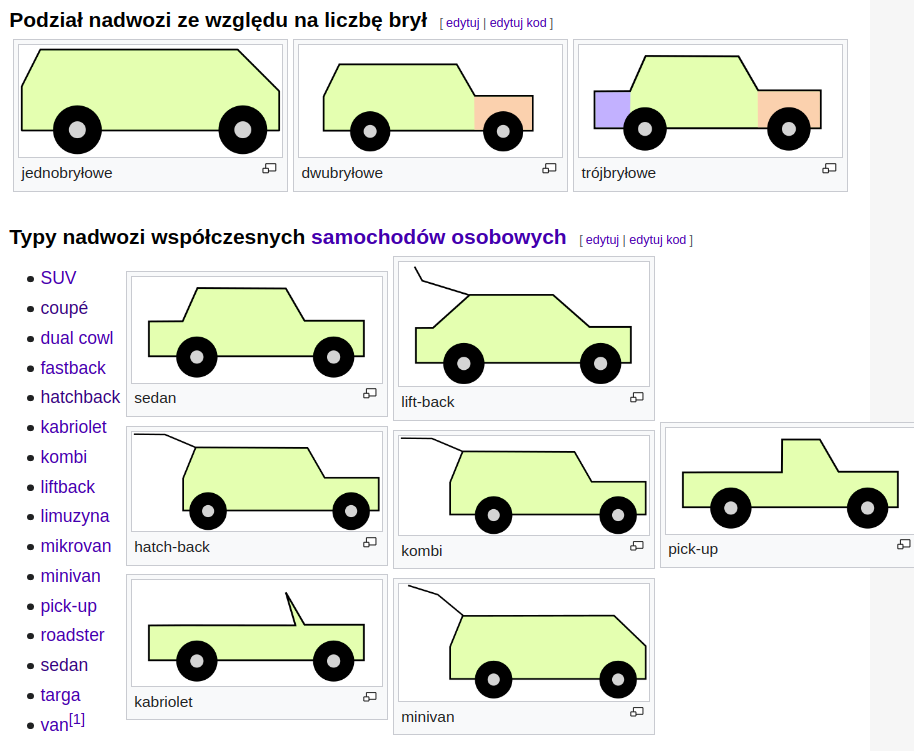

In [49]:
print(total['new_param_kraj-pochodzenia'].value_counts())

Niemcy               44889
Polska               39592
Francja               6052
Belgia                4916
Szwajcaria            2274
Holandia              2123
Stany Zjednoczone     2117
Włochy                1515
Austria               1260
Inny                  1227
Wielka Brytania        835
Dania                  815
Szwecja                680
Luksemburg             229
Kanada                 208
Czechy                 191
Hiszpania              121
Słowacja                38
Finlandia               33
Irlandia                28
Norwegia                17
Rosja                   14
Słowenia                 9
Grecja                   9
Litwa                    8
Monako                   7
Liechtenstein            6
Węgry                    5
Estonia                  5
Ukraina                  3
Rumunia                  2
Chorwacja                1
Bułgaria                 1
Białoruś                 1
Łotwa                    1
Name: new_param_kraj-pochodzenia, dtype: int64


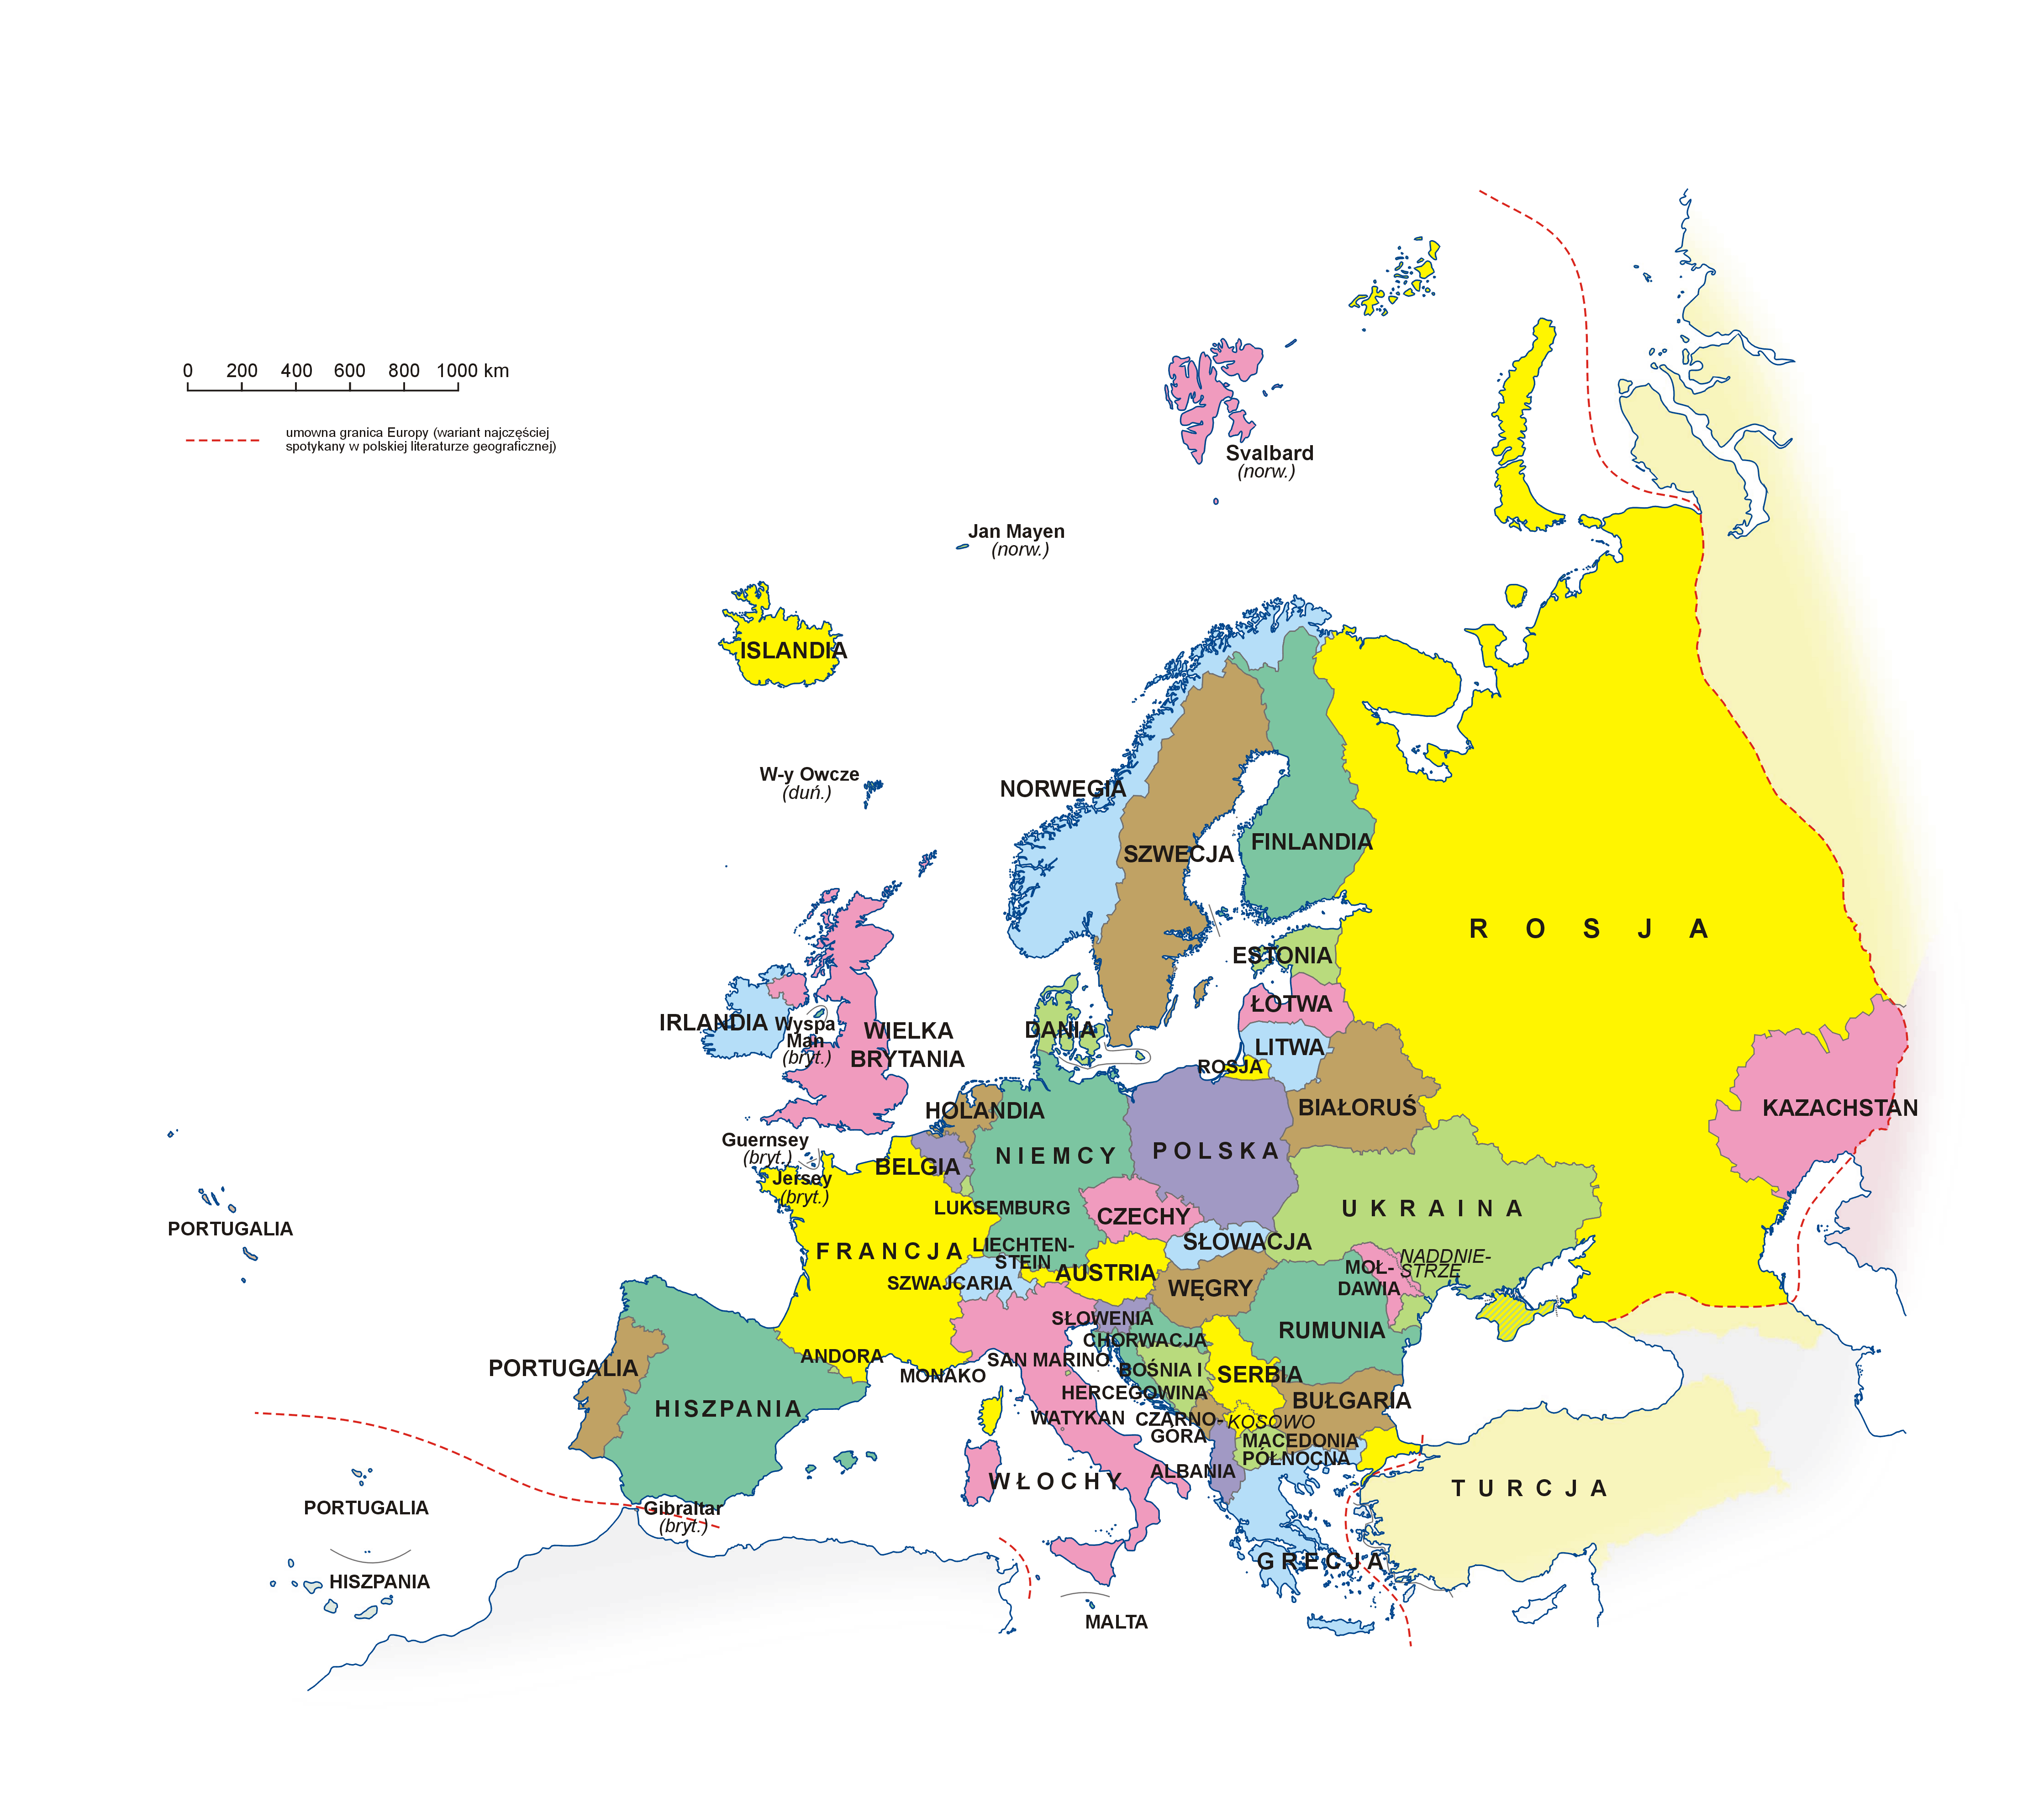

In [64]:
total['new_param_kraj_pochodzenia_2'] = total['new_param_kraj-pochodzenia']
total.loc[total['new_param_kraj-pochodzenia'].isna(), ['new_param_kraj_pochodzenia_2']] = 'Polska'
print(total['new_param_kraj_pochodzenia_2'].value_counts())


Polska               90976
Niemcy               44889
Francja               6052
Belgia                4916
Szwajcaria            2274
Holandia              2123
Stany Zjednoczone     2117
Włochy                1515
Austria               1260
Inny                  1227
Wielka Brytania        835
Dania                  815
Szwecja                680
Luksemburg             229
Kanada                 208
Czechy                 191
Hiszpania              121
Słowacja                38
Finlandia               33
Irlandia                28
Norwegia                17
Rosja                   14
Słowenia                 9
Grecja                   9
Litwa                    8
Monako                   7
Liechtenstein            6
Węgry                    5
Estonia                  5
Ukraina                  3
Rumunia                  2
Chorwacja                1
Bułgaria                 1
Białoruś                 1
Łotwa                    1
Name: new_param_kraj_pochodzenia_2, dtype: int64


In [65]:
#total.loc[total['new_param_kraj_pochodzenia_2'] == 'Słowacja', ['new_param_kraj_pochodzenia_2']] = 'Inny'


In [72]:
print(total.groupby(total['new_param_kraj_pochodzenia_2'])[['price_value_pln']]\
    .median()\
    .sort_values(by='price_value_pln',ascending=False))
 

                              price_value_pln
new_param_kraj_pochodzenia_2                 
Rosja                                 63549.5
Stany Zjednoczone                     59999.0
Kanada                                59900.0
Bułgaria                              39500.0
Inny                                  36900.0
Czechy                                35950.0
Polska                                34900.0
Liechtenstein                         31500.0
Słowacja                              30499.5
Grecja                                29900.0
Luksemburg                            28299.5
Litwa                                 27750.0
Hiszpania                             25900.0
Estonia                               25500.0
Białoruś                              25000.0
Szwajcaria                            24900.0
Słowenia                              24450.0
Belgia                                23700.0
Dania                                 22500.0
Węgry                             

In [73]:
total['encoded_new_param_kraj_pochodzenia'] = total['new_param_kraj_pochodzenia_2'].map( {
    'Rosja':1,
    'Stany Zjednoczone':2,
    'Kanada':3,
    'Bułgaria':4,
    'Inny':5,
    'Czechy':6,
    'Polska':7,
    'Liechtenstein':8,
    'Słowacja':9,
    'Grecja':10,
    'Luksemburg':11,
    'Litwa':12,
    'Łotwa':13,
    'Hiszpania':14,
    'Estonia':15,
    'Białoruś':16,
    'Szwajcaria':17,
    'Słowenia':18,
    'Chorwacja':19,
    'Belgia':20,
    'Dania':21,
    'Węgry':22,
    'Ukraina':23,
    'Francja':24,
    'Austria':25,
    'Włochy':26,
    'Szwecja':27,
    'Niemcy':28,
    'Holandia':29,
    'Finlandia':30,
    'Norwegia':31,
    'Monako':32,
    'Irlandia':33,
    'Rumunia':34,
    'Wielka Brytania':35,
})
print(total['encoded_new_param_kraj_pochodzenia'].value_counts())

7     90976
28    44889
24     6052
20     4916
17     2274
29     2123
2      2117
26     1515
25     1260
5      1227
35      835
21      815
27      680
11      229
3       208
6       191
14      121
9        38
30       33
33       28
31       17
1        14
10        9
18        9
12        8
32        7
8         6
15        5
22        5
23        3
34        2
13        1
16        1
19        1
4         1
Name: encoded_new_param_kraj_pochodzenia, dtype: int64


In [87]:
total['new_param_kraj_pochodzenia_Polska'] = total.apply(lambda row: 1 if 'Polska' == row['new_param_kraj-pochodzenia'] else 0, axis=1)
#print(total['new_param_kraj_pochodzenia_Polska'].value_counts())
total['new_param_kraj_pochodzenia_Niemcy'] = total.apply(lambda row: 1 if 'Niemcy' == row['new_param_kraj-pochodzenia'] else 0, axis=1)
total['new_param_kraj_pochodzenia_Francja'] = total.apply(lambda row: 1 if 'Francja' == row['new_param_kraj-pochodzenia'] else 0, axis=1)
total['new_param_kraj_pochodzenia_Belgia'] = total.apply(lambda row: 1 if 'Belgia' == row['new_param_kraj-pochodzenia'] else 0, axis=1)
total['new_param_kraj_pochodzenia_Szwajcaria'] = total.apply(lambda row: 1 if 'Szwajcaria' == row['new_param_kraj-pochodzenia'] else 0, axis=1)
total['new_param_kraj_pochodzenia_Holandia'] = total.apply(lambda row: 1 if 'Holandia' == row['new_param_kraj-pochodzenia'] else 0, axis=1)
total['new_param_kraj_pochodzenia_Stany_Zjednoczone'] = total.apply(lambda row: 1 if 'Stany Zjednoczone' == row['new_param_kraj-pochodzenia'] else 0, axis=1)
total['new_param_kraj_pochodzenia_Włochy'] = total.apply(lambda row: 1 if 'Włochy' == row['new_param_kraj-pochodzenia'] else 0, axis=1)
total['new_param_kraj_pochodzenia_Austria'] = total.apply(lambda row: 1 if 'Austria' == row['new_param_kraj-pochodzenia'] else 0, axis=1)
total['new_param_kraj_pochodzenia_Wielka_Brytania'] = total.apply(lambda row: 1 if 'Wielka Brytania' == row['new_param_kraj-pochodzenia'] else 0, axis=1)
total['new_param_kraj_pochodzenia_Dania'] = total.apply(lambda row: 1 if 'Dania' == row['new_param_kraj-pochodzenia'] else 0, axis=1)
total['new_param_kraj_pochodzenia_Szwecja'] = total.apply(lambda row: 1 if 'Szwecja' == row['new_param_kraj-pochodzenia'] else 0, axis=1)
total['new_param_kraj_pochodzenia_Luksemburg'] = total.apply(lambda row: 1 if 'Luksemburg' == row['new_param_kraj-pochodzenia'] else 0, axis=1)
total['new_param_kraj_pochodzenia_Kanada'] = total.apply(lambda row: 1 if 'Kanada' == row['new_param_kraj-pochodzenia'] else 0, axis=1)
total['new_param_kraj_pochodzenia_Czechy'] = total.apply(lambda row: 1 if 'Czechy' == row['new_param_kraj-pochodzenia'] else 0, axis=1)
total['new_param_kraj_pochodzenia_Hiszpania'] = total.apply(lambda row: 1 if 'Hiszpania' == row['new_param_kraj-pochodzenia'] else 0, axis=1)

total['new_param_kraj_pochodzenia_Inny'] = total.apply(lambda row: 1 if 'Inny' == row['new_param_kraj-pochodzenia'] else 0, axis=1)


In [85]:
print(total['new_param_rodzaj-paliwa'].value_counts())
total['new_param_rodzaj_paliwa_2'] = total['new_param_rodzaj-paliwa']
total.loc[total['new_param_rodzaj-paliwa'].isna(), ['new_param_rodzaj_paliwa_2']] = 'Benzyna'
total.loc[total['new_param_rodzaj-paliwa'] == 'Etanol', ['new_param_rodzaj_paliwa_2']] = 'Benzyna'
total.loc[total['new_param_rodzaj-paliwa'] == 'Wodór', ['new_param_rodzaj_paliwa_2']] = 'Hybryda'
print(total['new_param_rodzaj_paliwa_2'].value_counts())


Diesel         81448
Benzyna        70631
Benzyna+LPG     7187
Hybryda          960
Elektryczny      125
Benzyna+CNG      102
Wodór              1
Etanol             1
Name: new_param_rodzaj-paliwa, dtype: int64
Diesel         81448
Benzyna        70793
Benzyna+LPG     7187
Hybryda          961
Elektryczny      125
Benzyna+CNG      102
Name: new_param_rodzaj_paliwa_2, dtype: int64


In [84]:
total.loc[total['new_param_rodzaj_paliwa_2'] == 'Wodór', ['new_param_marka-pojazdu','new_param_model']] 

,new_param_marka-pojazdu,new_param_model
120311,Inny,Inny


In [86]:
total['encoded_new_param_rodzaj_paliwa'] = total['new_param_rodzaj_paliwa_2'].map( {
    'Diesel':1,
    'Benzyna':2,
    'Benzyna+LPG':3,
    'Benzyna+CNG':4,
    'Hybryda':5,
    'Elektryczny':6, 
})
print(total['encoded_new_param_rodzaj_paliwa'].value_counts())

1    81448
2    70793
3     7187
5      961
6      125
4      102
Name: encoded_new_param_rodzaj_paliwa, dtype: int64


In [88]:
total['new_param_rodzaj_paliwa_Diesel'] = total.apply(lambda row: 1 if 'Diesel' == row['new_param_rodzaj-paliwa'] else 0, axis=1)
total['new_param_rodzaj_paliwa_Benzyna'] = total.apply(lambda row: 1 if 'Benzyna' == row['new_param_rodzaj-paliwa'] else 0, axis=1)
total['new_param_rodzaj_paliwa_Benzyna_LPG'] = total.apply(lambda row: 1 if 'Benzyna+LPG' == row['new_param_rodzaj-paliwa'] else 0, axis=1)
total['new_param_rodzaj_paliwa_Benzyna_CNG'] = total.apply(lambda row: 1 if 'Benzyna+CNG' == row['new_param_rodzaj-paliwa'] else 0, axis=1)
total['new_param_rodzaj_paliwa_Hybryda'] = total.apply(lambda row: 1 if 'Hybryda' == row['new_param_rodzaj-paliwa'] else 0, axis=1)
total['new_param_rodzaj_paliwa_Elektryczny'] = total.apply(lambda row: 1 if 'Elektryczny' == row['new_param_rodzaj-paliwa'] else 0, axis=1)


In [92]:
print(total['new_param_skrzynia-biegów'].value_counts())
total['new_param_skrzynia_biegów_2'] = total['new_param_skrzynia-biegów']
total.loc[total['new_param_skrzynia-biegów'].isna(), ['new_param_skrzynia_biegów_2']] = 'Manualna'

print(total['new_param_skrzynia_biegów_2'].value_counts())


Manualna                                 110681
Automatyczna hydrauliczna (klasyczna)     27955
Automatyczna dwusprzęgłowa (DCT, DSG)      9629
Automatyczna bezstopniowa (CVT)            2302
Półautomatyczna (ASG, Tiptronic)           1304
Name: new_param_skrzynia-biegów, dtype: int64
Manualna                                 119426
Automatyczna hydrauliczna (klasyczna)     27955
Automatyczna dwusprzęgłowa (DCT, DSG)      9629
Automatyczna bezstopniowa (CVT)            2302
Półautomatyczna (ASG, Tiptronic)           1304
Name: new_param_skrzynia_biegów_2, dtype: int64


In [93]:
total['encoded_new_param_skrzynia_biegów'] = total['new_param_skrzynia_biegów_2'].map( {
    'Manualna':1,
    'Półautomatyczna (ASG, Tiptronic)':2, 
    'Automatyczna hydrauliczna (klasyczna)':3,
    'Automatyczna dwusprzęgłowa (DCT, DSG)':4, 
    'Automatyczna bezstopniowa (CVT)':5, 
})
print(total['encoded_new_param_skrzynia_biegów'].value_counts())

1    119426
3     27955
4      9629
5      2302
2      1304
Name: encoded_new_param_skrzynia_biegów, dtype: int64


In [95]:
total['new_param_skrzynia_biegów_Manualna'] = total.apply(lambda row: 1 if 'Manualna' == row['new_param_skrzynia-biegów'] else 0, axis=1)
total['new_param_skrzynia_biegów_Półautomatyczna'] = total.apply(lambda row: 1 if 'Półautomatyczna (ASG, Tiptronic)' == row['new_param_skrzynia-biegów'] else 0, axis=1)
total['new_param_skrzynia_biegów_Automatyczna_hydrauliczna'] = total.apply(lambda row: 1 if 'Automatyczna hydrauliczna (klasyczna)' == row['new_param_skrzynia-biegów'] else 0, axis=1)
total['new_param_skrzynia_biegów_Automatyczna_dwusprzęgłowa'] = total.apply(lambda row: 1 if 'Automatyczna dwusprzęgłowa (DCT, DSG)' == row['new_param_skrzynia-biegów'] else 0, axis=1)
total['new_param_skrzynia_biegów_Automatyczna_bezstopniowa'] = total.apply(lambda row: 1 if 'Automatyczna bezstopniowa (CVT)' == row['new_param_skrzynia-biegów'] else 0, axis=1)
print(total['new_param_skrzynia_biegów_Automatyczna_hydrauliczna'].value_counts())

0    132661
1     27955
Name: new_param_skrzynia_biegów_Automatyczna_hydrauliczna, dtype: int64


In [97]:
print(total['new_param_napęd'].value_counts())
total['new_param_napęd_2'] = total['new_param_napęd']
total.loc[total['new_param_napęd'].isna(), ['new_param_napęd_2']] = 'Na przednie koła'

print(total['new_param_napęd_2'].value_counts())


Na przednie koła                 99630
Na tylne koła                    12967
4x4 (stały)                      10641
4x4 (dołączany automatycznie)    10341
4x4 (dołączany ręcznie)           2424
Name: new_param_napęd, dtype: int64
Na przednie koła                 124243
Na tylne koła                     12967
4x4 (stały)                       10641
4x4 (dołączany automatycznie)     10341
4x4 (dołączany ręcznie)            2424
Name: new_param_napęd_2, dtype: int64


In [98]:
total['encoded_new_param_napęd'] = total['new_param_napęd_2'].map( {
    'Na przednie koła':1,
    '4x4 (stały)':2,
    '4x4 (dołączany automatycznie)':3,
    '4x4 (dołączany ręcznie)':4,
    'Na tylne koła':5,
})
print(total['encoded_new_param_napęd'].value_counts())

1    124243
5     12967
2     10641
3     10341
4      2424
Name: encoded_new_param_napęd, dtype: int64


In [130]:
total['new_param_napęd_Na_przednie_koła'] = total.apply(lambda row: 1 if 'Na przednie koła' == row['new_param_napęd'] else 0, axis=1)
total['new_param_napęd_4x4_stały'] = total.apply(lambda row: 1 if '4x4 (stały)' == row['new_param_napęd'] else 0, axis=1)
total['new_param_napęd_4x4_dołączany_automatycznie'] = total.apply(lambda row: 1 if '4x4 (dołączany automatycznie)' == row['new_param_napęd'] else 0, axis=1)
total['new_param_napęd_4x4_dołączany_ręcznie'] = total.apply(lambda row: 1 if '4x4 (dołączany ręcznie)' == row['new_param_napęd'] else 0, axis=1)
total['new_param_napęd_Na_tylne_koła'] = total.apply(lambda row: 1 if 'Na tylne koła' == row['new_param_napęd'] else 0, axis=1)
print(total['new_param_napęd_Na_przednie_koła'].value_counts())

1    99630
0    60986
Name: new_param_napęd_Na_przednie_koła, dtype: int64


In [102]:
print(total['new_param_kolor'].value_counts())
total['new_param_kolor_2'] = total['new_param_kolor']
total.loc[total['new_param_kolor'].isna(), ['new_param_kolor_2']] = 'Inny kolor'

print(total['new_param_kolor_2'].value_counts())


Czarny        39267
Srebrny       29515
Szary         21927
Biały         17687
Niebieski     17423
Inny kolor    11467
Czerwony       6246
Brązowy        4284
Zielony        3872
Bordowy        2850
Złoty          2448
Beżowy         2113
Fioletowy       736
Żółty           620
Name: new_param_kolor, dtype: int64
Czarny        39267
Srebrny       29515
Szary         21927
Biały         17687
Niebieski     17423
Inny kolor    11628
Czerwony       6246
Brązowy        4284
Zielony        3872
Bordowy        2850
Złoty          2448
Beżowy         2113
Fioletowy       736
Żółty           620
Name: new_param_kolor_2, dtype: int64


In [103]:
print(total.groupby(total['new_param_kolor_2'])[['price_value_pln']]\
    .median()\
    .sort_values(by='price_value_pln',ascending=False))


                   price_value_pln
new_param_kolor_2                 
Brązowy                    51000.0
Biały                      46500.0
Beżowy                     36650.0
Czarny                     29900.0
Szary                      28900.0
Czerwony                   23900.0
Inny kolor                 22900.0
Złoty                      19500.0
Bordowy                    19400.0
Fioletowy                  17900.0
Srebrny                    17900.0
Niebieski                  17000.0
Żółty                      14800.0
Zielony                    10800.0


In [105]:
total['encoded_new_param_kolor'] = total['new_param_kolor_2'].map( {
    'Czarny':4,
    'Srebrny':11,
    'Szary':5,
    'Biały':2,
    'Niebieski':12,
    'Inny kolor':7,
    'Czerwony':6,
    'Brązowy':1,
    'Zielony':14,
    'Bordowy':9,
    'Złoty':8,
    'Beżowy':3,
    'Fioletowy':10,
    'Żółty':13,
})
print(total['encoded_new_param_kolor'].value_counts())

4     39267
11    29515
5     21927
2     17687
12    17423
7     11628
6      6246
1      4284
14     3872
9      2850
8      2448
3      2113
10      736
13      620
Name: encoded_new_param_kolor, dtype: int64


In [113]:
total = pd.concat([total, pd.get_dummies(total['new_param_kolor_2'], prefix='new_param_kolor')], axis=1)

In [112]:
[col for col in total if col.startswith('new_param_kolor__')]

['new_param_kolor__Beżowy',
 'new_param_kolor__Biały',
 'new_param_kolor__Bordowy',
 'new_param_kolor__Brązowy',
 'new_param_kolor__Czarny',
 'new_param_kolor__Czerwony',
 'new_param_kolor__Fioletowy',
 'new_param_kolor__Inny kolor',
 'new_param_kolor__Niebieski',
 'new_param_kolor__Srebrny',
 'new_param_kolor__Szary',
 'new_param_kolor__Zielony',
 'new_param_kolor__Złoty',
 'new_param_kolor__Żółty']

In [115]:
print(total['new_param_filtr-cząstek-stałych'].value_counts())
#total['new_param_filtr_cząstek_stałych_2'] = total['new_param_filtr-cząstek-stałych']
#total.loc[total['new_param_filtr-cząstek-stałych'].isna(), ['new_param_filtr_cząstek_stałych_2']] = 'Inny'

#print(total['new_param_filtr_cząstek_stałych_2'].value_counts())


Tak    9434
Name: new_param_filtr-cząstek-stałych, dtype: int64


In [131]:
filter_col = ['car_id', 
    'new_param_typ', 'encoded_new_param_typ',
              
    'new_param_kraj_pochodzenia_2', 'encoded_new_param_kraj_pochodzenia',
    'new_param_kraj_pochodzenia_Polska', 'new_param_kraj_pochodzenia_Niemcy', 'new_param_kraj_pochodzenia_Francja',
    'new_param_kraj_pochodzenia_Belgia', 'new_param_kraj_pochodzenia_Szwajcaria', 'new_param_kraj_pochodzenia_Holandia',
    'new_param_kraj_pochodzenia_Stany_Zjednoczone', 'new_param_kraj_pochodzenia_Włochy', 'new_param_kraj_pochodzenia_Austria',
    'new_param_kraj_pochodzenia_Wielka_Brytania', 'new_param_kraj_pochodzenia_Dania', 'new_param_kraj_pochodzenia_Szwecja',
    'new_param_kraj_pochodzenia_Luksemburg', 'new_param_kraj_pochodzenia_Kanada', 'new_param_kraj_pochodzenia_Czechy', 
    'new_param_kraj_pochodzenia_Hiszpania', 'new_param_kraj_pochodzenia_Inny',
    
    'new_param_rodzaj_paliwa_2', 'encoded_new_param_rodzaj_paliwa',
    'new_param_rodzaj_paliwa_Diesel', 'new_param_rodzaj_paliwa_Benzyna', 'new_param_rodzaj_paliwa_Benzyna_LPG',
    'new_param_rodzaj_paliwa_Benzyna_CNG', 'new_param_rodzaj_paliwa_Hybryda', 'new_param_rodzaj_paliwa_Elektryczny',
    
    'new_param_skrzynia_biegów_2', 'encoded_new_param_skrzynia_biegów', 
    'new_param_skrzynia_biegów_Manualna', 'new_param_skrzynia_biegów_Półautomatyczna', 'new_param_skrzynia_biegów_Automatyczna_hydrauliczna',
    'new_param_skrzynia_biegów_Automatyczna_dwusprzęgłowa', 'new_param_skrzynia_biegów_Automatyczna_bezstopniowa',
    'new_param_napęd_2', 'encoded_new_param_napęd', 
    'new_param_napęd_Na_przednie_koła', 'new_param_napęd_4x4_stały', 'new_param_napęd_4x4_dołączany_automatycznie', 
    'new_param_napęd_4x4_dołączany_ręcznie', 'new_param_napęd_Na_tylne_koła', 
              
    'new_param_kolor_2', 'encoded_new_param_kolor',
    'new_param_kolor_Beżowy',  'new_param_kolor_Biały',  'new_param_kolor_Bordowy',  'new_param_kolor_Brązowy',  'new_param_kolor_Czarny',  'new_param_kolor_Czerwony',  'new_param_kolor_Fioletowy',  'new_param_kolor_Inny kolor',  'new_param_kolor_Niebieski',  'new_param_kolor_Srebrny',  'new_param_kolor_Szary',  'new_param_kolor_Zielony',  'new_param_kolor_Złoty',  'new_param_kolor_Żółty', 
    #'', 
]

In [132]:
total.loc[~total['price_value'].isnull(), filter_col].to_csv('output/ft_new_param_2_encoded_train.csv', index=False) 
total.loc[total['price_value'].isnull(), filter_col].to_csv('output/ft_new_param_2_encoded_test.csv', index=False) 


# waznis cech

In [151]:
#filter_col = [col for col in train if col.startswith('new_param_')]()
filter_col = ['new_param_rok-produkcji', 'new_param_przebieg', 'new_param_moc', 'new_param_liczba-drzwi', 'new_param_liczba-miejsc']
filter_col

['new_param_rok-produkcji',
 'new_param_przebieg',
 'new_param_moc',
 'new_param_liczba-drzwi',
 'new_param_liczba-miejsc']

In [153]:
xgb_rmodel = xgb.XGBRegressor().fit(train[filter_col], train['price_value_pln_log_transl'])
xgbfir.saveXgbFI(xgb_rmodel, feature_names=filter_col, OutputXlsxFile='output/new_param_XgbFI.xlsx')
pd.read_excel('output/new_param_XgbFI.xlsx', 'Interaction Depth 0')

,Interaction,Gain,FScore,wFScore,Average wFScore,Average Gain,Expected Gain,Gain Rank,FScore Rank,wFScore Rank,Avg wFScore Rank,Avg Gain Rank,Expected Gain Rank,Average Rank,Average Tree Index,Average Tree Depth
0,new_param_rok-produkcji,143592.250846,1278,115.354076,0.090261,112.357004,120306.032897,1,3,3,4,1,1,2.166667,48.082942,3.994523
1,new_param_moc,46630.316773,1518,250.523795,0.165035,30.718259,13886.824496,2,1,1,1,2,2,1.500000,43.173254,3.845850
2,new_param_przebieg,3320.294426,1392,184.185663,0.132317,2.385269,375.397931,3,2,2,2,4,3,2.666667,51.783764,3.937500
3,new_param_liczba-miejsc,848.828568,294,29.175916,0.099238,2.887172,90.279681,4,5,4,3,3,4,3.833333,45.384354,3.986395
4,new_param_liczba-drzwi,597.939401,295,20.741328,0.070310,2.026913,60.001328,5,4,5,5,5,5,4.833333,48.213559,4.261017


In [4]:
print(total['new_param_model'].value_counts())

KeyError: 'new_param_model'